In [17]:
from pathlib import Path
from matplotlib import pyplot as plt
from typing import Any, Literal
import warnings
import numpy as np
import pandas as pd
import polars as pl
from scipy import stats
import scikit_posthocs as sp
import seaborn as sns


# surpass all future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

data_dir = Path('/mnt/eqa/zhangyuanfeng/methylation/data_for_plot/5_impact_factors')
rmse = pl.read_csv('/mnt/eqa/zhangyuanfeng/methylation/best_pipeline/data/evaluated/before/c_rmse/rmse.csv')
rmse

shape: (11_550_851, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ lab ‚îÜ sample ‚îÜ feature                         ‚îÜ fgroup               ‚îÜ count  ‚îÜ rmse      ‚îÇ
‚îÇ --- ‚îÜ ---    ‚îÜ ---                             ‚îÜ ---                  ‚îÜ ---    ‚îÜ ---       ‚îÇ
‚îÇ str ‚îÜ str    ‚îÜ str                             ‚îÜ str                  ‚îÜ i64    ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ BS1 ‚îÜ BC_1   ‚îÜ compact_beta_bin:compact_depth‚Ä¶ ‚îÜ 80‚Äì90:4x:-0.1 ‚Äì 0.0  ‚îÜ 254024 ‚îÜ 17.548689 ‚îÇ
‚îÇ BS1 ‚îÜ BC_1   ‚îÜ compact_beta_bin:compact_depth‚Ä¶ ‚îÜ 70‚Äì80:4x:-0.4 ‚Äì -0.3 ‚îÜ 14919  ‚îÜ 19.589668 ‚îÇ
‚îÇ BS1 ‚îÜ BC_1   ‚îÜ compact_beta_bin:compact_depth‚Ä¶ ‚îÜ 0‚Äì10:5‚Äì10x:0.0 ‚Äì 0.1 ‚îÜ 405395 ‚îÜ 6.961485  ‚îÇ
‚îÇ BS1 ‚îÜ BC_1   ‚îÜ compact_beta_bin:compact_depth‚Ä¶ ‚îÜ 40‚Äì50:1x:0.1 ‚Äì 0.2   ‚îÜ 823    ‚îÜ 50.05778  ‚îÇ
‚îÇ BS1 ‚îÜ BC_1   ‚îÜ compact_beta_bin:compact_depth‚Ä¶ ‚îÜ 50‚Äì60:4x:-0.2 ‚Äì -0.1 ‚îÜ 4855   ‚îÜ 25.198284 ‚îÇ
‚îÇ ‚Ä¶   ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶                               ‚îÜ ‚Ä¶                    ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ RR1 ‚îÜ T4_2   ‚îÜ compact_beta_bin:compact_depth‚Ä¶ ‚îÜ 0‚Äì10:1x:0.34‚Äì0.36    ‚îÜ 48     ‚îÜ 6.853593  ‚îÇ
‚îÇ RR1 ‚îÜ T4_2   ‚îÜ compact_beta_bin:compact_depth‚Ä¶ ‚îÜ 20‚Äì30:2x:0.02‚Äì0.04   ‚îÜ 1      ‚îÜ 76.063662 ‚îÇ
‚îÇ RR1 ‚îÜ T4_2   ‚îÜ compact_beta_bin:compact_depth‚Ä¶ ‚îÜ 20‚Äì30:‚â•10x:0.1‚Äì0.12  ‚îÜ 1584   ‚îÜ 14.026082 ‚îÇ
‚îÇ RR1 ‚îÜ T4_2   ‚îÜ compact_beta_bin:compact_depth‚Ä¶ ‚îÜ 30‚Äì40:3x:0.28‚Äì0.3    ‚îÜ 7      ‚îÜ 28.732296 ‚îÇ
‚îÇ RR1 ‚îÜ T4_2   ‚îÜ compact_beta_bin:compact_depth‚Ä¶ ‚îÜ 90‚Äì100:4x:0.16‚Äì0.18  ‚îÜ 124    ‚îÜ 17.573031 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [ ]:
# def calculate_mean_ranks(data, tool_cols, better="smaller"):
#     """
#     ËÆ°ÁÆóÊØè‰∏™Â∑•ÂÖ∑ÁöÑÂπ≥ÂùáÁß©ÔºåÂπ∂Á°ÆÂÆö‰ºòÂä£È°∫Â∫è
#     :param data: ÂÆΩÊ†ºÂºèDataFrameÔºàÊ†∑Êú¨√óÂ∑•ÂÖ∑Ôºâ
#     :param tool_cols: Â∑•ÂÖ∑ÂàóÂêçÂàóË°®
#     :param better: ÊåáÊ†áÊñπÂêë ("smaller"=Ë∂äÂ∞èË∂äÂ•Ω, "larger"=Ë∂äÂ§ßË∂äÂ•Ω)
#     :return: Âπ≥ÂùáÁß©DataFrame + ÊéíÂ∫èÂêéÁöÑÂ∑•ÂÖ∑ÂàóË°®
#     """
#     # ÂàõÂª∫Áß©Áü©ÈòµÔºàÂØπÊØè‰∏™Ê†∑Êú¨ÂÜÖÈÉ®ÊéíÂêçÔºâ
#     rank_matrix = data[tool_cols].rank(axis=1, method='average', 
#                                      ascending=(better=="smaller"))
    
#     # ËÆ°ÁÆóÊØè‰∏™Â∑•ÂÖ∑ÁöÑÂπ≥ÂùáÁß©
#     mean_ranks = rank_matrix.mean().reset_index()
#     mean_ranks.columns = ['Tool', 'Mean Rank']
    
#     # ÊåâÂπ≥ÂùáÁß©ÊéíÂ∫èÔºàË∂äÂ∞èË∂äÂ•Ω ‚Üí ÂçáÂ∫èÔºõË∂äÂ§ßË∂äÂ•Ω ‚Üí ÈôçÂ∫èÔºâ
#     mean_ranks = mean_ranks.sort_values(
#         'Mean Rank', 
#         ascending=(better=="smaller")
#     ).reset_index(drop=True)
    
#     # ËøîÂõûÊéíÂ∫èÂêéÁöÑÂ∑•ÂÖ∑ÂàóË°®Ôºà‰ºò‚ÜíÂä£Ôºâ
#     sorted_tools = mean_ranks['Tool'].tolist()
    
#     return mean_ranks, sorted_tools


# # 5. ÁîüÊàêÊòæËëóÊÄßÂàÜÁªÑÔºàÂÖ≥ÈîÆÔºÅÁ°ÆÂÆöÈ°∫Â∫è‰∏≠Âì™‰∫õÂ∑ÆÂºÇÊòæËëóÔºâ
# def generate_groups(posthoc_matrix, sorted_tools, alpha=0.05):
#     """
#     ÁîüÊàêÂ∑•ÂÖ∑ÂàÜÁªÑÔºàÂ≠óÊØçÊ†áËÆ∞Ê≥ïÔºâ
#     :param posthoc_matrix: Nemenyi pÂÄºÁü©Èòµ
#     :param sorted_tools: ÊåâÂπ≥ÂùáÁß©ÊéíÂ∫èÁöÑÂ∑•ÂÖ∑ÂàóË°®
#     :param alpha: ÊòæËëóÊÄßÊ∞¥Âπ≥
#     :return: ÊØè‰∏™Â∑•ÂÖ∑ÁöÑÂàÜÁªÑÂ≠óÊØç
#     """
#     n = len(sorted_tools)
#     groups = {tool: [] for tool in sorted_tools}
    
#     # Ê≠•È™§1: ÊâæÂá∫ÊâÄÊúâ‰∏çÊòæËëóÁöÑÂ∑•ÂÖ∑ÂØπÔºàp > alphaÔºâ
#     non_sig_pairs = []
#     for i in range(n):
#         for j in range(i+1, n):
#             p_val = posthoc_matrix.loc[sorted_tools[i], sorted_tools[j]]
#             if p_val > alpha:
#                 non_sig_pairs.append((sorted_tools[i], sorted_tools[j]))
    
#     # Ê≠•È™§2: ÊûÑÂª∫ÂàÜÁªÑÔºà‰º†ÈÄíÊÄßÂàÜÁªÑÔºâ
#     for tool in sorted_tools:
#         # ÊØè‰∏™Â∑•ÂÖ∑Ëá≥Â∞ëÂ±û‰∫éËá™Â∑±ÁöÑÁªÑ
#         groups[tool] = [tool]
        
#         # Ê£ÄÊü•‰∏éÂÖ∂‰ªñÂ∑•ÂÖ∑ÁöÑÈùûÊòæËëóÂÖ≥Á≥ª
#         for t1, t2 in non_sig_pairs:
#             if tool == t1 and t2 in sorted_tools[:sorted_tools.index(tool)]:
#                 # Â¶ÇÊûú‰∏éÂâçÈù¢ÁöÑÂ∑•ÂÖ∑‰∏çÊòæËëóÔºåÂä†ÂÖ•ÂÖ∂ÁªÑ
#                 groups[tool] = groups[t2] + [tool]
#             elif tool == t2 and t1 in sorted_tools[:sorted_tools.index(tool)]:
#                 # Â¶ÇÊûú‰∏éÂêéÈù¢ÁöÑÂ∑•ÂÖ∑‰∏çÊòæËëóÔºåÂä†ÂÖ•ÂÖ∂ÁªÑ
#                 groups[tool] = [tool] + groups[t1]
    
#     # Ê≠•È™§3: ÂêàÂπ∂ÈáçÂ§çÁªÑ
#     unique_groups = {}
#     for tool, group in groups.items():
#         group_key = tuple(sorted(set(group)))
#         if group_key not in unique_groups:
#             unique_groups[group_key] = chr(97 + len(unique_groups))  # a, b, c...
    
#     # Ê≠•È™§4: ‰∏∫ÊØè‰∏™Â∑•ÂÖ∑ÂàÜÈÖçÂ≠óÊØç
#     tool_letters = {}
#     for tool in sorted_tools:
#         for group, letter in unique_groups.items():
#             if tool in group:
#                 tool_letters[tool] = letter
#                 break
    
#     return tool_letters


# def plot_cd_diagram(mean_ranks, posthoc, k, alpha=0.05):
#     plt.figure(figsize=(10, 3))
#     # ËÆ°ÁÆó‰∏¥ÁïåË∑ùÁ¶ª (CD)
#     n_samples = len(df)
#     q_alpha = 2.569  # alpha=0.05, k=4 (Êü•Nemenyi‰∏¥ÁïåÂÄºË°®)
#     cd = q_alpha * np.sqrt(k*(k+1)/(6*n_samples))
    
#     # ÁªòÂà∂Â∑•ÂÖ∑‰ΩçÁΩÆ
#     positions = np.linspace(0, 1, len(sorted_tools))
#     plt.hlines(0, 0, 1, colors='k', linestyles='solid')
#     for i, tool in enumerate(sorted_tools):
#         plt.plot(positions[i], 0, 'o', markersize=10, color='red')
#         plt.text(positions[i], 0.02, f"{tool}\n({mean_ranks.loc[mean_ranks['Tool']==tool, 'Mean Rank'].values[0]:.1f})", 
#                 ha='center', va='bottom')
    
#     # Ê∑ªÂä†ÂàÜÁªÑÊ®™Á∫ø
#     group_lines = {}
#     for i, tool_i in enumerate(sorted_tools):
#         for j, tool_j in enumerate(sorted_tools[i+1:], start=i+1):
#             p_val = posthoc.loc[tool_i, tool_j]
#             if p_val > alpha:
#                 # ËÆ°ÁÆóÁªÑÊ†áËØÜ
#                 group_key = f"{tool_letters[tool_i]}-{tool_letters[tool_j]}"
#                 if group_key not in group_lines:
#                     group_lines[group_key] = []
#                 group_lines[group_key].append((i, j))
    
#     # ÁªòÂà∂ÂàÜÁªÑÁ∫ø
#     y_offset = -0.05
#     for group_key, pairs in group_lines.items():
#         min_i = min(min(pair) for pair in pairs)
#         max_j = max(max(pair) for pair in pairs)
#         plt.hlines(y_offset, positions[min_i], positions[max_j], 
#                     colors='blue', linewidth=4)
#         plt.text((positions[min_i] + positions[max_j])/2, y_offset-0.02, 
#                 tool_letters[sorted_tools[min_i]], 
#                 ha='center', color='blue')
#         y_offset -= 0.05
    
#     plt.title(f"Critical Difference Diagram (CD={cd:.2f})")
#     plt.axis('off')
#     plt.tight_layout()
#     plt.savefig('cd_diagram.png', dpi=300)
#     plt.show()


In [2]:
def calculate_mean_ranks(data: pd.DataFrame,
                         item_cols: list[str],
                         better: Literal['smaller',
                         'larger'] = "smaller"):
    """
    ËÆ°ÁÆóÊØè‰∏™Â∑•ÂÖ∑ÁöÑÂπ≥ÂùáÁß©Âπ∂Á°ÆÂÆö‰ºòÂä£È°∫Â∫è

    Args:
        data: ÂÆΩÊ†ºÂºèDataFrameÔºåÊØèË°å‰∏Ä‰∏™Ê†∑Êú¨ÔºåÊØèÂàó‰∏Ä‰∏™Â∑•ÂÖ∑ÁöÑÊµãÈáèÂÄº
        item_cols: Â∑•ÂÖ∑ÂàóÂêçÂàóË°®ÔºàÂøÖÈ°ªÂ≠òÂú®‰∫édata‰∏≠Ôºâ
        better: ÊåáÊ†á‰ºòÂåñÊñπÂêë
                - "smaller": ÊåáÊ†áË∂äÂ∞èË∂äÂ•ΩÔºàÂ¶ÇËØØÂ∑Æ„ÄÅÊó∂Èó¥Ôºâ
                - "larger": ÊåáÊ†áË∂äÂ§ßË∂äÂ•ΩÔºàÂ¶ÇÂáÜÁ°ÆÁéá„ÄÅÁÅµÊïèÂ∫¶Ôºâ

    Returns:
        TupleÂåÖÂê´Ôºö
        - mean_ranks: DataFrameÔºåÂàóÂåÖÊã¨['Item', 'Mean Rank']
        - sorted_items: ÊåâÊÄßËÉΩ‰ªé‰ºòÂà∞Âä£ÊéíÂ∫èÁöÑÂ∑•ÂÖ∑ÂàóË°®
    """
    # ÂàõÂª∫Áß©Áü©ÈòµÔºàÂØπÊØè‰∏™Ê†∑Êú¨ÂÜÖÈÉ®ÊéíÂêçÔºâ
    rank_matrix: pd.DataFrame = data[item_cols].rank(axis=1, method='average',
                                                     ascending=(better == better))

    # ËÆ°ÁÆóÊØè‰∏™Â∑•ÂÖ∑ÁöÑÂπ≥ÂùáÁß©
    mean_ranks: pd.DataFrame
    mean_ranks = rank_matrix.mean().reset_index()
    mean_ranks.columns = ['Item', 'Mean Rank']

    # ÊåâÂπ≥ÂùáÁß©ÊéíÂ∫èÔºàË∂äÂ∞èË∂äÂ•Ω ‚Üí ÂçáÂ∫èÔºõË∂äÂ§ßË∂äÂ•Ω ‚Üí ÈôçÂ∫èÔºâ
    mean_ranks = (mean_ranks.sort_values('Mean Rank',
                                        ascending=(better == better))
                            .reset_index(drop=True))

    # ËøîÂõûÊéíÂ∫èÂêéÁöÑÂ∑•ÂÖ∑ÂàóË°®Ôºà‰ºò‚ÜíÂä£Ôºâ
    sorted_items = mean_ranks['Item'].tolist()

    return mean_ranks, sorted_items


def perform_friedman_test(data: pd.DataFrame,
                          tool_cols: list[str]) -> tuple[float, float, float]:
    tool_data = [data[col].values for col in tool_cols]
    stat, p_value = stats.friedmanchisquare(*tool_data)
    n_samples = len(data)
    k = len(tool_cols)
    kendall_w = stat / (n_samples * (k - 1)) if (n_samples * (k - 1)) != 0 else 0.0

    return stat, p_value, kendall_w


def perform_nemenyi_test(data: pd.DataFrame,
                         tool_cols: list[str]) -> pd.DataFrame:
    """
    ÊâßË°åNemenyi‰∫ãÂêéÊ£ÄÈ™å

    Args:
        data: ÂÆΩÊ†ºÂºèDataFrameÔºåÊØèË°å‰∏Ä‰∏™Ê†∑Êú¨ÔºåÊØèÂàó‰∏Ä‰∏™Â∑•ÂÖ∑ÁöÑÊµãÈáèÂÄº
        tool_cols: Â∑•ÂÖ∑ÂàóÂêçÂàóË°®

    Returns:
        pÂÄºÁü©ÈòµDataFrameÔºåË°åÂíåÂàóÂùá‰∏∫Â∑•ÂÖ∑ÂêçÔºåÂÄº‰∏∫Ê†°Ê≠£ÂêéÁöÑpÂÄº
    """
    return sp.posthoc_nemenyi_friedman(data[tool_cols],
                                       melted=False)


def generate_significance_groups(posthoc_matrix: pd.DataFrame,
                                 sorted_tools: list[str],
                                 alpha: float = 0.05) -> dict[str, str]:
    """
    ÁîüÊàêÂ∑•ÂÖ∑ÁöÑÊòæËëóÊÄßÂàÜÁªÑÔºàÂ≠óÊØçÊ†áËÆ∞Ê≥ïÔºâ

    Args:
        posthoc_matrix: NemenyiÊ£ÄÈ™åÁöÑpÂÄºÁü©Èòµ
        sorted_tools: ÊåâÂπ≥ÂùáÁß©ÊéíÂ∫èÁöÑÂ∑•ÂÖ∑ÂàóË°®Ôºà‰ªé‰ºòÂà∞Âä£Ôºâ
        alpha: ÊòæËëóÊÄßÊ∞¥Âπ≥ÔºåÈªòËÆ§0.05

    Returns:
        Â≠óÂÖ∏ÔºåÈîÆ‰∏∫Â∑•ÂÖ∑ÂêçÔºåÂÄº‰∏∫ÂàÜÁªÑÂ≠óÊØçÔºàÂ¶Ç{'tool_A': 'a', 'tool_B': 'a', 'tool_C': 'b'}Ôºâ
    """
    n = len(sorted_tools)
    tool_letters = {}

    # Ê≠•È™§1: ÊâæÂá∫ÊâÄÊúâ‰∏çÊòæËëóÁöÑÂ∑•ÂÖ∑ÂØπÔºàp > alphaÔºâ
    non_sig_pairs = []
    for i in range(n):
        for j in range(i + 1, n):
            p_val = posthoc_matrix.loc[sorted_tools[i], sorted_tools[j]]
            if p_val > alpha:
                non_sig_pairs.append((sorted_tools[i], sorted_tools[j]))

    # Ê≠•È™§2: ÊûÑÂª∫ÂàÜÁªÑÔºà‰º†ÈÄíÊÄßÂàÜÁªÑÔºâ
    # ÂàùÂßãÂåñÔºöÊØè‰∏™Â∑•ÂÖ∑Ëá™Êàê‰∏ÄÁªÑ
    groups = {tool: [tool] for tool in sorted_tools}

    # ÂêàÂπ∂‰∏çÊòæËëóÁöÑÂ∑•ÂÖ∑ÂØπ
    changed = True
    while changed:
        changed = False
        for tool1, tool2 in non_sig_pairs:
            # Ëé∑ÂèñÂΩìÂâçÁªÑ
            group1 = next(g for g in groups.values() if tool1 in g)
            group2 = next(g for g in groups.values() if tool2 in g)

            # Â¶ÇÊûú‰∏çÂú®Âêå‰∏ÄÁªÑÔºåÂêàÂπ∂
            if group1 != group2:
                new_group = sorted(set(group1 + group2), key=sorted_tools.index)
                # Êõ¥Êñ∞ÊâÄÊúâÁõ∏ÂÖ≥Â∑•ÂÖ∑ÁöÑÁªÑ
                for tool in new_group:
                    groups[tool] = new_group
                changed = True

    # Ê≠•È™§3: ÂàÜÈÖçÂ≠óÊØçÊ†áÁ≠æ
    unique_groups = {}
    for tool in sorted_tools:
        group_key = tuple(sorted(set(groups[tool]), key=sorted_tools.index))
        if group_key not in unique_groups:
            unique_groups[group_key] = chr(97 + len(unique_groups))  # a, b, c...

    # ‰∏∫ÊØè‰∏™Â∑•ÂÖ∑ÂàÜÈÖçÂ≠óÊØç
    for tool in sorted_tools:
        group = tuple(sorted(set(groups[tool]), key=sorted_tools.index))
        tool_letters[tool] = unique_groups[group]

    return tool_letters


def plot_critical_difference_diagram(mean_ranks: pd.DataFrame,
                                     posthoc_matrix: pd.DataFrame,
                                     sorted_tools: list[str],
                                     alpha: float = 0.05,
                                     output_path: str | None = None,
                                     figsize: tuple[int, int] = (10, 3)
) -> None:
    """
    ÁªòÂà∂‰∏¥ÁïåÂ∑ÆÂºÇÂõæÔºàCD DiagramÔºâ

    Args:
        mean_ranks: ÂåÖÂê´Â∑•ÂÖ∑ÂíåÂπ≥ÂùáÁß©ÁöÑDataFrame
        posthoc_matrix: NemenyiÊ£ÄÈ™åÁöÑpÂÄºÁü©Èòµ
        sorted_tools: ÊåâÂπ≥ÂùáÁß©ÊéíÂ∫èÁöÑÂ∑•ÂÖ∑ÂàóË°®
        alpha: ÊòæËëóÊÄßÊ∞¥Âπ≥
        output_path: ‰øùÂ≠òË∑ØÂæÑÔºàÂ¶ÇÊûú‰∏∫NoneÂàôÊòæÁ§∫ÂõæÂΩ¢Ôºâ
        figsize: ÂõæÂΩ¢Â∞∫ÂØ∏
    """
    plt.figure(figsize=figsize)

    # ËÆ°ÁÆó‰ΩçÁΩÆ
    n_tools = len(sorted_tools)
    positions = np.linspace(0, 1, n_tools)

    # ËÆ°ÁÆó‰∏¥ÁïåË∑ùÁ¶ª (CD)
    n_samples = len(mean_ranks)  # ÂÆûÈôÖÂ∫î‰∏∫ÂéüÂßãÊï∞ÊçÆÁöÑÊ†∑Êú¨Èáè
    k = n_tools
    # Nemenyi‰∏¥ÁïåÂÄºË°® (alpha=0.05)
    q_table = {3: 2.344, 4: 2.569, 5: 2.728, 6: 2.850, 7: 2.949, 8: 3.031, 9: 3.102, 10: 3.165}
    q_alpha = q_table.get(k, 2.569)  # ÈªòËÆ§k=4
    cd = q_alpha * np.sqrt(k * (k + 1) / (6 * n_samples))

    # ÁªòÂà∂Â∑•ÂÖ∑‰ΩçÁΩÆ
    plt.hlines(0, 0, 1, colors='k', linestyles='solid')
    for i, tool in enumerate(sorted_tools):
        rank = mean_ranks.loc[mean_ranks['Item'] == tool, 'Mean Rank'].values[0]
        plt.plot(positions[i], 0, 'o', markersize=10, color='red')
        plt.text(positions[i], 0.02, f"{tool}\n({rank:.1f})",
                 ha='center', va='bottom', fontsize=9)

    # Ê∑ªÂä†ÂàÜÁªÑÊ®™Á∫ø
    y_offset = -0.05
    drawn_groups = set()

    for i, tool_i in enumerate(sorted_tools):
        for j, tool_j in enumerate(sorted_tools[i + 1:], start=i + 1):
            p_val = posthoc_matrix.loc[tool_i, tool_j]
            if p_val > alpha:
                # Ëé∑ÂèñÂàÜÁªÑÂ≠óÊØç
                group_i = mean_ranks.loc[mean_ranks['Item'] == tool_i, 'Group'].values[0]
                group_j = mean_ranks.loc[mean_ranks['Item'] == tool_j, 'Group'].values[0]

                # Á°Æ‰øùÂè™ÁªòÂà∂‰∏ÄÊ¨°ÊØèÁªÑ
                group_key = tuple(sorted([group_i, group_j]))
                if group_key in drawn_groups:
                    continue
                drawn_groups.add(group_key)

                # ÁªòÂà∂Ê®™Á∫ø
                plt.hlines(y_offset, positions[i], positions[j],
                           colors='blue', linewidth=4)
                plt.text((positions[i] + positions[j]) / 2, y_offset - 0.02,
                         group_i, ha='center', color='blue', fontsize=10)
                y_offset -= 0.05

    plt.title(f"Critical Difference Diagram (CD={cd:.2f})")
    plt.axis('off')
    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"CDÂõæÂ∑≤‰øùÂ≠òËá≥: {output_path}")
    else:
        plt.show()
    plt.close()


def generate_ranking_report(mean_ranks: pd.DataFrame,
                            posthoc_matrix: pd.DataFrame,
                            sorted_tools: list[str],
                            alpha: float = 0.05) -> str:
    """
    ÁîüÊàêÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÁöÑÊñáÊú¨Êä•Âëä

    Args:
        mean_ranks: ÂåÖÂê´Â∑•ÂÖ∑„ÄÅÂπ≥ÂùáÁß©ÂíåÂàÜÁªÑÁöÑDataFrame
        posthoc_matrix: NemenyiÊ£ÄÈ™åÁöÑpÂÄºÁü©Èòµ
        sorted_tools: ÊåâÂπ≥ÂùáÁß©ÊéíÂ∫èÁöÑÂ∑•ÂÖ∑ÂàóË°®
        alpha: ÊòæËëóÊÄßÊ∞¥Âπ≥

    Returns:
        Ê†ºÂºèÂåñÁöÑÊñáÊú¨Êä•Âëä
    """
    report_lines = ["===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä ====="]

    # Ê∑ªÂä†ÊúÄ‰ºòÂ∑•ÂÖ∑
    best_tool = sorted_tools[0]
    best_rank = mean_ranks.loc[mean_ranks['Item'] == best_tool, 'Mean Rank'].values[0]
    best_group = mean_ranks.loc[mean_ranks['Item'] == best_tool, 'Group'].values[0]
    report_lines.append(f"1. ÊúÄ‰ºòÂ∑•ÂÖ∑: {best_tool} (Âπ≥ÂùáÁß©={best_rank:.2f}, ÁªÑ={best_group})")

    # Ê∑ªÂä†ÂêéÁª≠Â∑•ÂÖ∑
    for i in range(1, len(sorted_tools)):
        curr_tool = sorted_tools[i]
        prev_tool = sorted_tools[i - 1]
        curr_rank = mean_ranks.loc[mean_ranks['Item'] == curr_tool, 'Mean Rank'].values[0]
        curr_group = mean_ranks.loc[mean_ranks['Item'] == curr_tool, 'Group'].values[0]
        p_val = posthoc_matrix.loc[prev_tool, curr_tool]

        # Á°ÆÂÆöÂÖ≥Á≥ªÊèèËø∞
        if p_val < alpha:
            relation = f"ÊòæËëóÂ∑Æ‰∫é {prev_tool}"
        else:
            relation = f"‰∏é {prev_tool} Êó†ÊòæËëóÂ∑ÆÂºÇ"

        report_lines.append(
            f"{i + 1}. {curr_tool} (Âπ≥ÂùáÁß©={curr_rank:.2f}, ÁªÑ={curr_group}): {relation} (p={p_val:.4f})"
        )

    return "\n".join(report_lines)


def analyze_tool_performance(data: pd.DataFrame,
                             tool_cols: list[str],
                             better: Literal["smaller", "larger"] = "smaller",
                             alpha: float = 0.05,
                             output_cd_diagram: bool = False,
                             cd_diagram_path: str = "cd_diagram.png") -> dict[str, Any]:
    """
    ÂÆåÊï¥ÂàÜÊûêÂ∑•ÂÖ∑ÊÄßËÉΩÂ∑ÆÂºÇÂπ∂Á°ÆÂÆöÁõ∏ÂØπ‰ºòÂä£È°∫Â∫è

    Args:
        data: ÂÆΩÊ†ºÂºèDataFrameÔºåÊØèË°å‰∏Ä‰∏™Ê†∑Êú¨ÔºåÊØèÂàó‰∏Ä‰∏™Â∑•ÂÖ∑ÁöÑÊµãÈáèÂÄº
        tool_cols: Â∑•ÂÖ∑ÂàóÂêçÂàóË°®
        better: ÊåáÊ†á‰ºòÂåñÊñπÂêëÔºà"smaller"Êàñ"larger"Ôºâ
        alpha: ÊòæËëóÊÄßÊ∞¥Âπ≥
        output_cd_diagram: ÊòØÂê¶ËæìÂá∫CDÂõæ
        cd_diagram_path: CDÂõæ‰øùÂ≠òË∑ØÂæÑ

    Returns:
        ÂåÖÂê´ÊâÄÊúâÂàÜÊûêÁªìÊûúÁöÑÂ≠óÂÖ∏
    """
    # 1. ËÆ°ÁÆóÂπ≥ÂùáÁß©ÂíåÊéíÂ∫è
    mean_ranks, sorted_tools = calculate_mean_ranks(data, tool_cols, better)

    # 2. ÊâßË°åFriedmanÊ£ÄÈ™å
    stat, p_friedman, kendall_w = perform_friedman_test(data, tool_cols)

    # 3. ÂàùÂßãÂåñÁªìÊûúÂ≠óÂÖ∏
    results = {
        "mean_ranks": mean_ranks.copy(),
        "sorted_tools": sorted_tools,
        "friedman_stat": stat,
        "friedman_p": p_friedman,
        "kendall_w": kendall_w,
        "significant": p_friedman < alpha,
        "report": ""
    }

    # 4. Â¶ÇÊûúFriedmanÊòæËëóÔºåËøõË°åÂêéÁª≠ÂàÜÊûê
    if p_friedman < alpha:
        # ÊâßË°åNemenyiÊ£ÄÈ™å
        posthoc = perform_nemenyi_test(data, tool_cols)

        # ÁîüÊàêÂàÜÁªÑ
        tool_letters = generate_significance_groups(posthoc, sorted_tools, alpha)

        # Ê∑ªÂä†ÂàÜÁªÑÂà∞mean_ranks
        mean_ranks['Group'] = mean_ranks['Item'].map(tool_letters)

        # Êõ¥Êñ∞results‰∏≠ÁöÑmean_ranks
        results["mean_ranks"] = mean_ranks.copy()

        # Êõ¥Êñ∞ÁªìÊûú
        results.update({
            "posthoc_matrix": posthoc,
            "tool_groups": tool_letters
        })

        # ÁîüÊàêCDÂõæ
        if output_cd_diagram:
            plot_critical_difference_diagram(
                mean_ranks,
                posthoc,
                sorted_tools,
                alpha=alpha,
                output_path=cd_diagram_path
            )

        # ÁîüÊàêÊä•Âëä
        results["report"] = generate_ranking_report(
            mean_ranks,
            posthoc,
            sorted_tools,
            alpha=alpha
        )

    return results


def print_analysis_summary(results: dict[str, Any]) -> None:
    """
    ÊâìÂç∞ÂàÜÊûêÁªìÊûúÊëòË¶Å

    Args:
        results: analyze_tool_performanceÁöÑËøîÂõûÁªìÊûú
    """
    print("\n===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====")

    # ÊâìÂç∞FriedmanÁªìÊûú
    print(f"FriedmanÊ£ÄÈ™å: œá¬≤={results['friedman_stat']:.2f}, "
          f"p={results['friedman_p']:.6f}, "
          f"W={results['kendall_w']:.3f}")

    # ÊâìÂç∞Âπ≥ÂùáÁß©
    print("\nÂ∑•ÂÖ∑Âπ≥ÂùáÁß©:")
    print(results["mean_ranks"].to_string(index=False))

    # ÊâìÂç∞ÊéíÂ∫è
    print(f"\n‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: {results['sorted_tools']}")

    # ÊâìÂç∞ÊòæËëóÊÄßÁªìÊûú
    if results["significant"]:
        print("\nFriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ")
        print("\nÂ∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:")
        print(results["mean_ranks"][['Item', 'Mean Rank', 'Group']].to_string(index=False))

        if results["report"]:
            print(f"\n{results['report']}")
    else:
        print("\nFriedmanÊ£ÄÈ™å‰∏çÊòæËëó (p‚â•0.05)ÔºåÂ∑•ÂÖ∑Èó¥Êó†ÁªüËÆ°Â≠¶Â∑ÆÂºÇ")

# Beta values

<Axes: xlabel='fgroup', ylabel='rmse'>

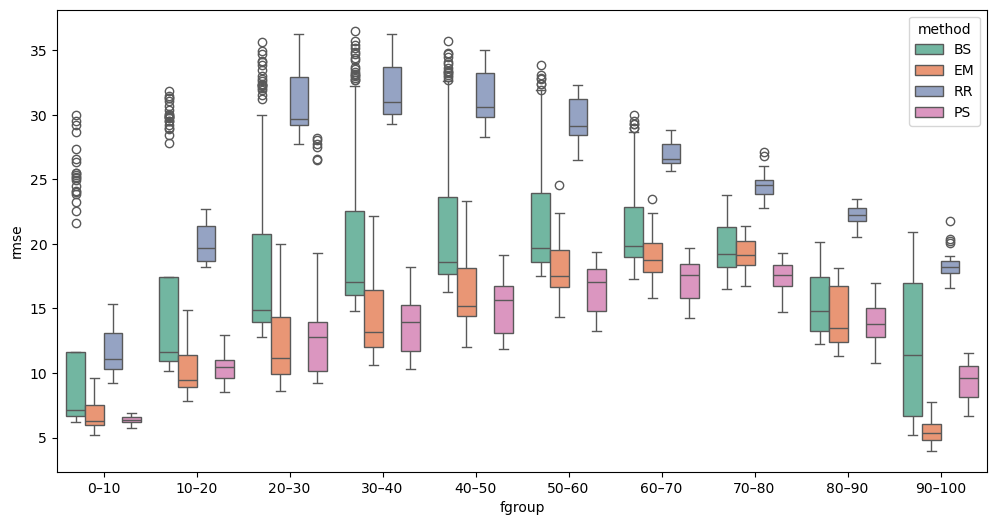

In [3]:
beta_rows = (
    rmse.filter(pl.col('feature') == 'compact_beta_bin')
        .unique(subset=['lab', 'sample', 'fgroup'])
        .with_columns(pl.col('lab').str.head(n=2).alias('method'))
        .to_pandas())
beta_rows['fgroup'] = pd.Categorical(values=beta_rows['fgroup'],
                                     categories=['0‚Äì10', '10‚Äì20', '20‚Äì30', '30‚Äì40',
                                                 '40‚Äì50', '50‚Äì60', '60‚Äì70', '70‚Äì80',
                                                 '80‚Äì90', '90‚Äì100'],
                                     ordered=True)
beta_rows['method'] = pd.Categorical(values=beta_rows['method'],
                                     categories=['BS', 'EM', 'RR', 'PS'],
                                     ordered=True)
fig = plt.figure(figsize=(12, 6))
sns.boxplot(data=beta_rows, x='fgroup', y='rmse', hue='method', palette='Set2')

In [4]:
beta_rows

lab sample           feature  fgroup    count       rmse method
0     BS2   M8_1  compact_beta_bin   60‚Äì70  3161157  18.455637     BS
1     EM2   T2_2  compact_beta_bin   40‚Äì50  1373259  15.681651     EM
2     EM2   D5_1  compact_beta_bin  90‚Äì100    36380   5.862073     EM
3     BS2   M8_2  compact_beta_bin    0‚Äì10  2467185   6.346909     BS
4     BS1   T2_1  compact_beta_bin   10‚Äì20  2375412  11.467687     BS
...   ...    ...               ...     ...      ...        ...    ...
2395  BS3   T1_2  compact_beta_bin  90‚Äì100    30103   7.066476     BS
2396  BS3   BL_1  compact_beta_bin   40‚Äì50  2710905  18.552790     BS
2397  BS3   T3_2  compact_beta_bin  90‚Äì100    29524   7.200322     BS
2398  BS1   T1_2  compact_beta_bin   50‚Äì60  1686184  20.005437     BS
2399  RR1   F7_1  compact_beta_bin  90‚Äì100    14820  18.467443     RR

[2400 rows x 7 columns]

In [5]:
(rmse.filter(pl.col('feature') == 'compact_beta_bin')
     .unique(subset=['lab', 'sample', 'fgroup'])
     .rename({'fgroup': 'Beta Bins (%)',
              'rmse': 'RMSE'})
     .drop('feature')
     .write_csv((data_dir / '2_detailed_beta_values' / 'beta_rows.csv')))

In [6]:
beta_rows_wide = (
    rmse.filter(pl.col('feature') == 'compact_beta_bin')
        .unique(subset=['lab', 'sample', 'fgroup']).pivot(
    on='fgroup', values='rmse',
    index=['lab', 'sample']
))

beta_bins: list[str] = ['0‚Äì10', '10‚Äì20', '20‚Äì30', '30‚Äì40', '40‚Äì50',
                        '50‚Äì60', '60‚Äì70', '70‚Äì80', '80‚Äì90', '90‚Äì100']

beta_test_results = analyze_tool_performance(
        data=beta_rows_wide.to_pandas(),
        tool_cols=beta_bins,
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(beta_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=1589.47, p=0.000000, W=0.736

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
  Item  Mean Rank Group
  0‚Äì10   1.675000     a
90‚Äì100   1.787500     a
 10‚Äì20   3.179167     b
 80‚Äì90   4.845833     c
 20‚Äì30   5.208333     c
 30‚Äì40   6.316667     d
 40‚Äì50   7.308333     e
 70‚Äì80   7.995833     e
 50‚Äì60   8.141667     e
 60‚Äì70   8.541667     e

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['0‚Äì10', '90‚Äì100', '10‚Äì20', '80‚Äì90', '20‚Äì30', '30‚Äì40', '40‚Äì50', '70‚Äì80', '50‚Äì60', '60‚Äì70']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
  Item  Mean Rank Group
  0‚Äì10   1.675000     a
90‚Äì100   1.787500     a
 10‚Äì20   3.179167     b
 80‚Äì90   4.845833     c
 20‚Äì30   5.208333     c
 30‚Äì40   6.316667     d
 40‚Äì50   7.308333     e
 70‚Äì80   7.995833     e
 50‚Äì60   8.141667     e
 60‚Äì70   8.541667     e

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: 0‚Äì10

# Depth bin

<Axes: xlabel='fgroup', ylabel='rmse'>

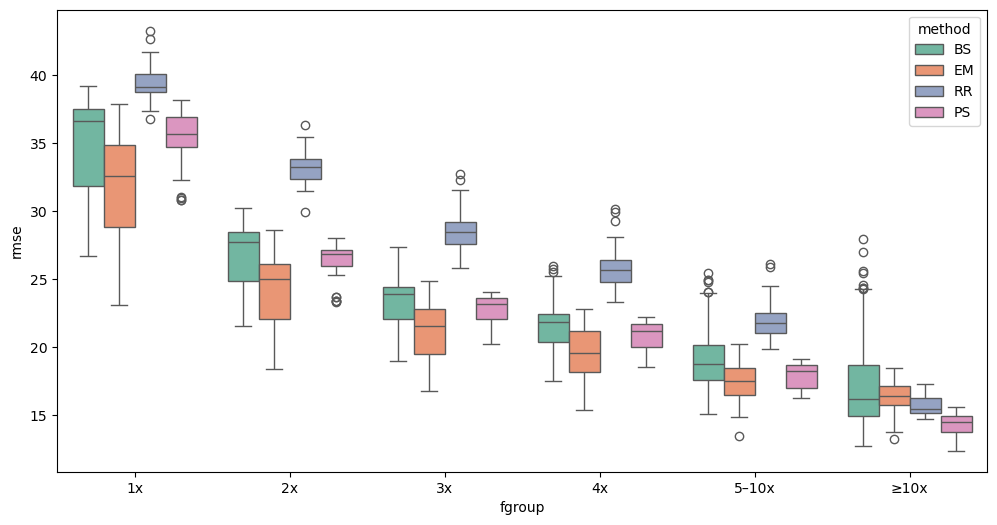

In [7]:
depth_rows: pl.DataFrame = (rmse.filter(pl.col('feature') == 'compact_depth_bin')
                                .unique(subset=['lab', 'sample', 'fgroup'])
                                .with_columns(pl.col('lab').str.head(n=2).alias('method'))
                                .to_pandas())
depth_rows['fgroup'] = pd.Categorical(values=depth_rows['fgroup'],
                                     categories=['1x', '2x', '3x', '4x', '5‚Äì10x', '‚â•10x'],
                                     ordered=True)
depth_rows['method'] = pd.Categorical(values=depth_rows['method'],
                                     categories=['BS', 'EM', 'RR', 'PS'],
                                     ordered=True)

fig = plt.figure(figsize=(12, 6))
sns.boxplot(data=depth_rows, x='fgroup', y='rmse', hue='method', palette='Set2')

In [29]:
(rmse.filter(pl.col('feature') == 'compact_depth_bin')
     .unique(subset=['lab', 'sample', 'fgroup'])
     .rename({'fgroup': 'Depth Bins (x)',
              'rmse': 'RMSE'})
     .drop('feature')
     .write_csv((data_dir / '3_detailed_depth' / 'depth_rows.csv')))

In [8]:
depth_rows_wide = (
    rmse.filter(pl.col('feature') == 'compact_depth_bin')
        .unique(subset=['lab', 'sample', 'fgroup'])
        .pivot(on='fgroup', values='rmse',
               index=['lab', 'sample']
))

depth_bins: list[str] = ['1x', '2x', '3x', '4x', '5‚Äì10x', '‚â•10x']
depth_test_results = analyze_tool_performance(
        data=depth_rows_wide.to_pandas(),
        tool_cols=depth_bins,
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(depth_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=1179.74, p=0.000000, W=0.983

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
 Item  Mean Rank Group
 ‚â•10x   1.116667     a
5‚Äì10x   1.916667     b
   4x   2.975000     c
   3x   3.991667     d
   2x   5.000000     e
   1x   6.000000     f

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['‚â•10x', '5‚Äì10x', '4x', '3x', '2x', '1x']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
 Item  Mean Rank Group
 ‚â•10x   1.116667     a
5‚Äì10x   1.916667     b
   4x   2.975000     c
   3x   3.991667     d
   2x   5.000000     e
   1x   6.000000     f

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: ‚â•10x (Âπ≥ÂùáÁß©=1.12, ÁªÑ=a)
2. 5‚Äì10x (Âπ≥ÂùáÁß©=1.92, ÁªÑ=b): ÊòæËëóÂ∑Æ‰∫é ‚â•10x (p=0.0000)
3. 4x (Âπ≥ÂùáÁß©=2.98, ÁªÑ=c): ÊòæËëóÂ∑Æ‰∫é 5‚Äì10x (p=0.0000)
4. 3x (Âπ≥ÂùáÁß©=3.99, ÁªÑ=d): ÊòæËëóÂ∑Æ‰∫é 4x (p=0.0000)
5. 2x (Âπ≥ÂùáÁß©=5.00, ÁªÑ=e): ÊòæËëóÂ∑Æ‰∫é 3x (p=0.0000)
6. 1x (Âπ≥ÂùáÁß©=6.00, ÁªÑ=f): Ê

In [ ]:
results_df.to_csv(data_dir / '3_detailed_depth' / 'posthoc_nemenyi_friedman_depth.csv',
                  index=False)

# beta + depth

In [9]:
beta_depth_rows = (
    rmse.filter(pl.col('feature') == 'compact_depth_bin:compact_beta_bin')
        .unique(subset=['lab', 'sample', 'feature', 'fgroup'])
        .with_columns(pl.col('fgroup').str.splitn(by=':', n=2).alias('tmp'))
        .unnest('tmp')
        .rename({'field_0': 'Depth Bin (x)', 'field_1': 'Beta Bin (%)'})
        .drop('feature', 'fgroup')
)

beta_depth_rows

shape: (14_314, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ lab ‚îÜ sample ‚îÜ count  ‚îÜ rmse      ‚îÜ Depth Bin (x) ‚îÜ Beta Bin (%) ‚îÇ
‚îÇ --- ‚îÜ ---    ‚îÜ ---    ‚îÜ ---       ‚îÜ ---           ‚îÜ ---          ‚îÇ
‚îÇ str ‚îÜ str    ‚îÜ i64    ‚îÜ f64       ‚îÜ str           ‚îÜ str          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ RR1 ‚îÜ D5_1   ‚îÜ 372119 ‚îÜ 33.293791 ‚îÜ 1x            ‚îÜ 70‚Äì80        ‚îÇ
‚îÇ BS4 ‚îÜ M8_2   ‚îÜ 688921 ‚îÜ 27.006727 ‚îÜ 5‚Äì10x         ‚îÜ 0‚Äì10         ‚îÇ
‚îÇ EM3 ‚îÜ M8_1   ‚îÜ 2829   ‚îÜ 18.498666 ‚îÜ 2x            ‚îÜ 10‚Äì20        ‚îÇ
‚îÇ BS4 ‚îÜ BC_2   ‚îÜ 11712  ‚îÜ 13.554527 ‚îÜ 4x            ‚îÜ 90‚Äì100       ‚îÇ
‚îÇ PS3 ‚îÜ M8_1   ‚îÜ 195    ‚îÜ 24.151814 ‚îÜ 3x            ‚îÜ 20‚Äì30        ‚îÇ
‚îÇ ‚Ä¶   ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶             ‚îÜ ‚Ä¶            ‚îÇ
‚îÇ EM1 ‚îÜ T3_2   ‚îÜ 54187  ‚îÜ 27.89114  ‚îÜ 3x            ‚îÜ 60‚Äì70        ‚îÇ
‚îÇ EM1 ‚îÜ D6_1   ‚îÜ 145    ‚îÜ 22.891891 ‚îÜ 1x            ‚îÜ 80‚Äì90        ‚îÇ
‚îÇ PS3 ‚îÜ BL_1   ‚îÜ 3834   ‚îÜ 20.37608  ‚îÜ 3x            ‚îÜ 10‚Äì20        ‚îÇ
‚îÇ EM3 ‚îÜ T3_2   ‚îÜ 94181  ‚îÜ 12.400613 ‚îÜ ‚â•10x          ‚îÜ 80‚Äì90        ‚îÇ
‚îÇ PS3 ‚îÜ T3_2   ‚îÜ 10133  ‚îÜ 12.271387 ‚îÜ 5‚Äì10x         ‚îÜ 10‚Äì20        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [104]:
beta_depth_rows.write_csv(data_dir / '3_detailed_depth' / 'beta_depth_rows.csv')

In [10]:
beta_depth_wide = (
    beta_depth_rows.pivot(on='Depth Bin (x)', values='rmse',
                          index=['lab', 'sample', 'Beta Bin (%)'])
                   .drop_nulls()
)
depth_bins: list[str] = ['1x', '2x', '3x', '4x', '5‚Äì10x', '‚â•10x']

depth_beta_test_results = analyze_tool_performance(
        data=beta_depth_wide.to_pandas(),
        tool_cols=depth_bins,
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(depth_beta_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=10769.84, p=0.000000, W=0.915

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
 Item  Mean Rank Group
 ‚â•10x   1.118471     a
5‚Äì10x   2.036518     b
   4x   3.025902     c
   3x   3.991083     d
   2x   4.966879     e
   1x   5.861146     f

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['‚â•10x', '5‚Äì10x', '4x', '3x', '2x', '1x']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
 Item  Mean Rank Group
 ‚â•10x   1.118471     a
5‚Äì10x   2.036518     b
   4x   3.025902     c
   3x   3.991083     d
   2x   4.966879     e
   1x   5.861146     f

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: ‚â•10x (Âπ≥ÂùáÁß©=1.12, ÁªÑ=a)
2. 5‚Äì10x (Âπ≥ÂùáÁß©=2.04, ÁªÑ=b): ÊòæËëóÂ∑Æ‰∫é ‚â•10x (p=0.0000)
3. 4x (Âπ≥ÂùáÁß©=3.03, ÁªÑ=c): ÊòæËëóÂ∑Æ‰∫é 5‚Äì10x (p=0.0000)
4. 3x (Âπ≥ÂùáÁß©=3.99, ÁªÑ=d): ÊòæËëóÂ∑Æ‰∫é 4x (p=0.0000)
5. 2x (Âπ≥ÂùáÁß©=4.97, ÁªÑ=e): ÊòæËëóÂ∑Æ‰∫é 3x (p=0.0000)
6. 1x (Âπ≥ÂùáÁß©=5.86, ÁªÑ=f): 

<Axes: xlabel='beta', ylabel='rmse'>

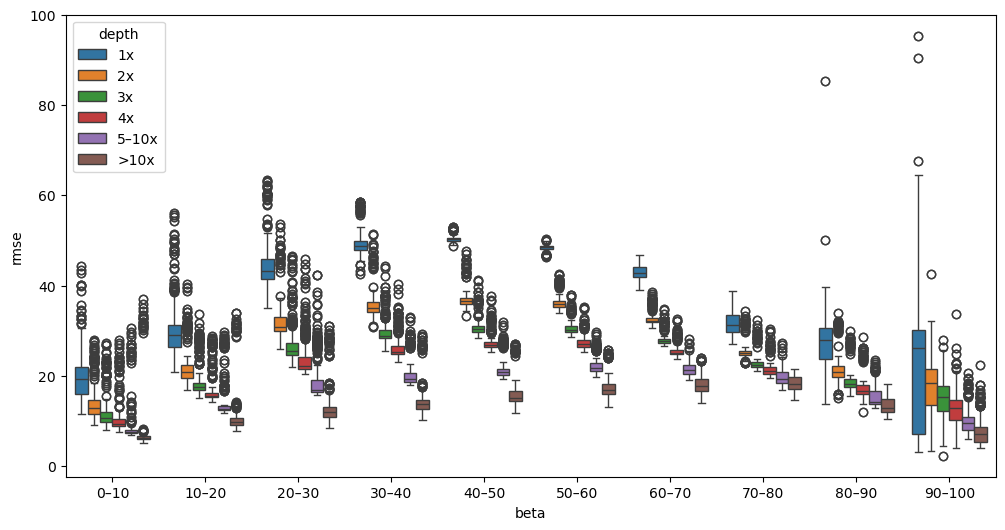

In [31]:
fig = plt.figure(figsize=(12, 6))
sns.boxplot(data=beta_depth_rows, x='beta', y='rmse', hue='depth')

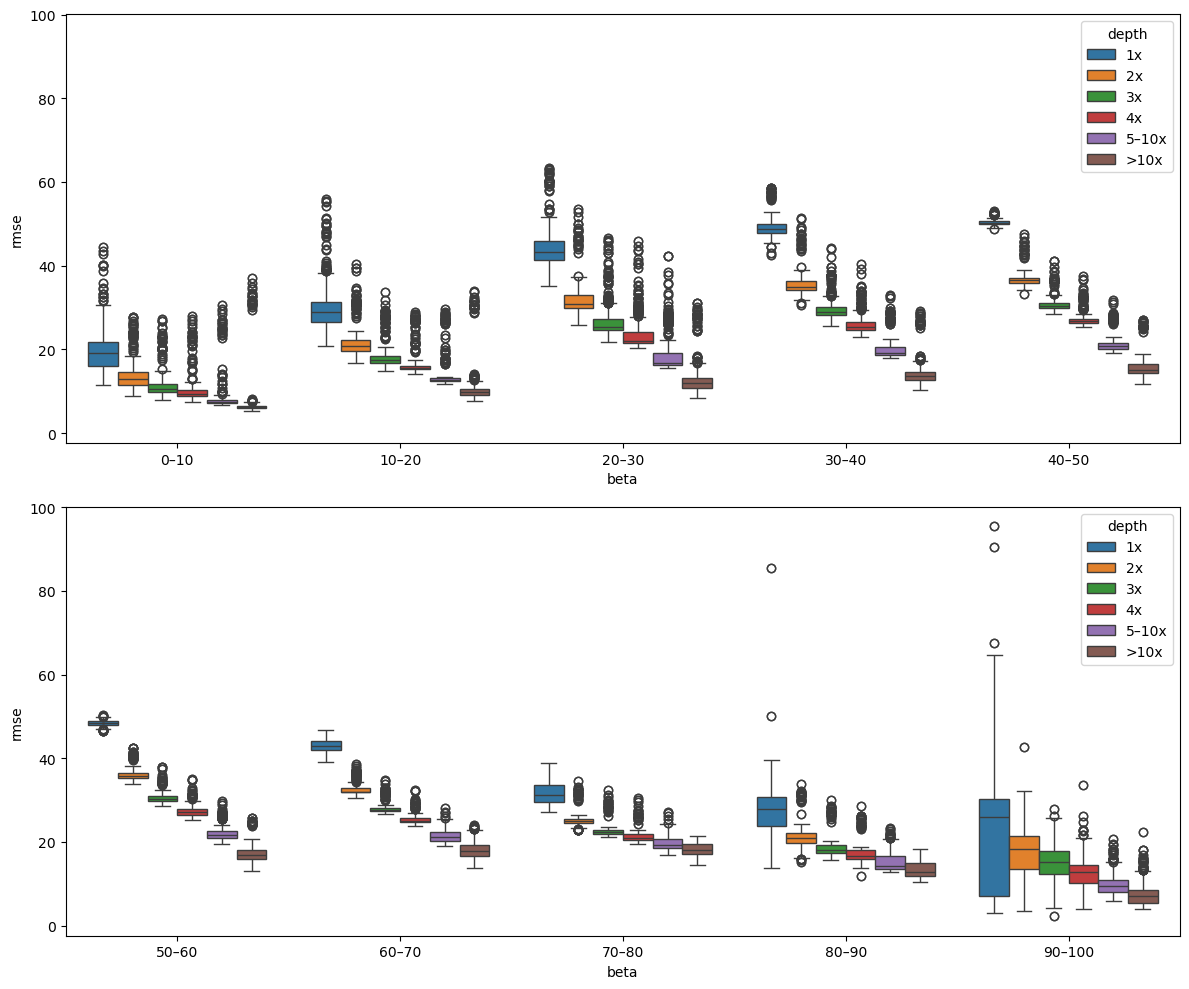

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharey=True)
axes = axes.flatten()
beta_bins1: list[str] = ['0‚Äì10', '10‚Äì20', '20‚Äì30', '30‚Äì40', '40‚Äì50']
beta_bins2: list[str] = ['50‚Äì60', '60‚Äì70', '70‚Äì80', '80‚Äì90', '90‚Äì100']

sns.boxplot(data=beta_depth_rows.filter(pl.col('beta').is_in(beta_bins1)),
            x='beta', y='rmse', hue='depth', ax=axes[0])
sns.boxplot(data=beta_depth_rows.filter(pl.col('beta').is_in(beta_bins2)),
            x='beta', y='rmse', hue='depth', ax=axes[1])

plt.tight_layout()

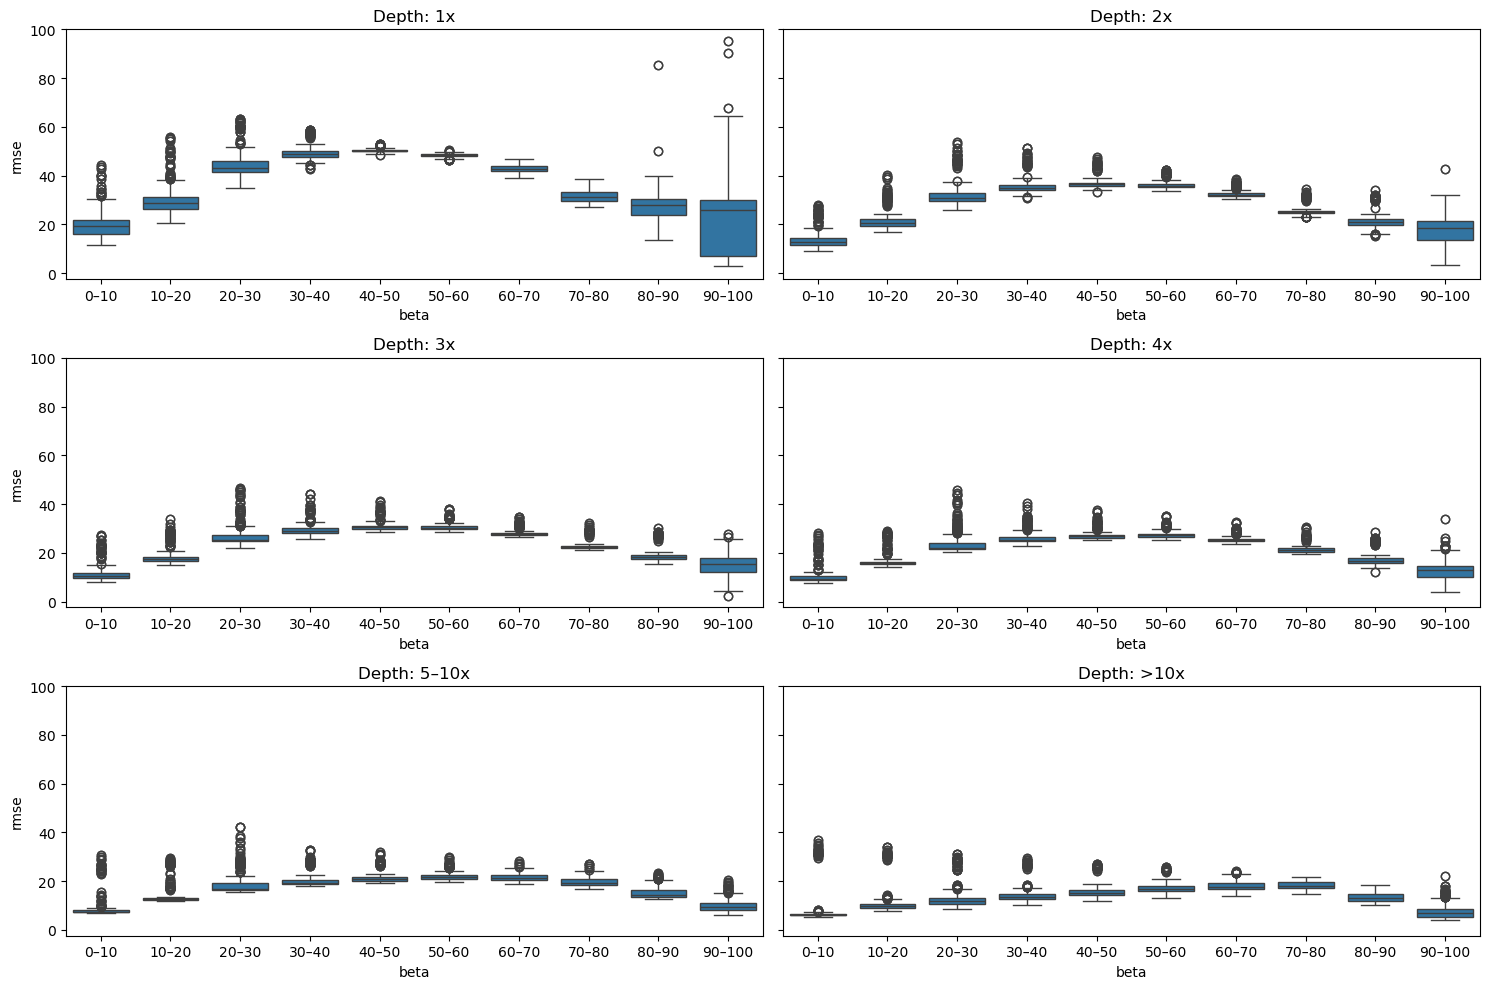

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharey=True)
axes = axes.flatten()
depth_bins = ['1x', '2x', '3x', '4x', '5‚Äì10x', '>10x']

for i, depth in enumerate(depth_bins):
    sns.boxplot(data=beta_depth_rows.filter(pl.col('depth') == depth).to_pandas(),
                x='beta', y='rmse', ax=axes[i])
    axes[i].set_title(f'Depth: {depth}')

plt.tight_layout()

In [37]:
(beta_depth_rows.rename({'depth': 'Depth Bin (x)',
                         'beta': 'Beta Bin (%)'})
                .drop('feature', 'fgroup')
                .with_columns(pl.col('Depth Bin (x)').str.replace(pattern='>', value='‚â•'))
                .write_csv(data_dir / 'beta_depth_bins.csv'))

# Cpg Density

In [ ]:
cpg_density_rows: pl.DataFrame = (
    rmse.filter(pl.col('feature').str.contains('cpg'),
                pl.col('fgroup').str.contains('>10x'))
        .unique(subset=['lab', 'sample', 'fgroup'])
        .with_columns(pl.col('lab').str.head(n=2).alias('method'))
        .with_columns(pl.col('fgroup').str.splitn(by=':', n=3).alias('tmp'))
        .unnest('tmp')
        .rename({'field_0': 'Beta Bin (%)', 'field_1': 'Depth Bin (x)', 'field_2': 'CpG Density'})
        .with_columns(pl.col('CpG Density').replace(old=['cpg_island', 'cpg_shore',
                                                         'cpg_shelve', 'cpg_inter'],
                                                    new=['CpG Islands', 'CpG Shores',
                                                         'CpG Shelves', 'Open Sea']))
        .drop('feature', 'fgroup', 'Depth Bin (x)')
    )
cpg_density_rows

shape: (9_403, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ lab ‚îÜ sample ‚îÜ count   ‚îÜ rmse      ‚îÜ method ‚îÜ Beta Bin (%) ‚îÜ CpG Density ‚îÇ
‚îÇ --- ‚îÜ ---    ‚îÜ ---     ‚îÜ ---       ‚îÜ ---    ‚îÜ ---          ‚îÜ ---         ‚îÇ
‚îÇ str ‚îÜ str    ‚îÜ i64     ‚îÜ f64       ‚îÜ str    ‚îÜ str          ‚îÜ str         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ EM4 ‚îÜ F7_1   ‚îÜ 2702    ‚îÜ 4.933476  ‚îÜ EM     ‚îÜ 90‚Äì100       ‚îÜ CpG Shores  ‚îÇ
‚îÇ BS2 ‚îÜ T4_1   ‚îÜ 125321  ‚îÜ 18.689078 ‚îÜ BS     ‚îÜ 60‚Äì70        ‚îÜ CpG Shelves ‚îÇ
‚îÇ BS3 ‚îÜ T1_1   ‚îÜ 176327  ‚îÜ 10.360266 ‚îÜ BS     ‚îÜ 10‚Äì20        ‚îÜ CpG Islands ‚îÇ
‚îÇ EM4 ‚îÜ F7_1   ‚îÜ 3156    ‚îÜ 4.884772  ‚îÜ EM     ‚îÜ 90‚Äì100       ‚îÜ CpG Shelves ‚îÇ
‚îÇ BS2 ‚îÜ BL_2   ‚îÜ 29849   ‚îÜ 16.224816 ‚îÜ BS     ‚îÜ 30‚Äì40        ‚îÜ CpG Islands ‚îÇ
‚îÇ ‚Ä¶   ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶           ‚îÇ
‚îÇ BS2 ‚îÜ D5_2   ‚îÜ 1606928 ‚îÜ 6.086883  ‚îÜ BS     ‚îÜ 0‚Äì10         ‚îÜ Open Sea    ‚îÇ
‚îÇ PS3 ‚îÜ T3_1   ‚îÜ 5813    ‚îÜ 10.576878 ‚îÜ PS     ‚îÜ 80‚Äì90        ‚îÜ CpG Shelves ‚îÇ
‚îÇ PS3 ‚îÜ F7_1   ‚îÜ 1401647 ‚îÜ 10.884539 ‚îÜ PS     ‚îÜ 30‚Äì40        ‚îÜ Open Sea    ‚îÇ
‚îÇ PS1 ‚îÜ BC_2   ‚îÜ 688433  ‚îÜ 25.083053 ‚îÜ PS     ‚îÜ 20‚Äì30        ‚îÜ Open Sea    ‚îÇ
‚îÇ BS3 ‚îÜ F7_1   ‚îÜ 646057  ‚îÜ 5.279619  ‚îÜ BS     ‚îÜ 0‚Äì10         ‚îÜ CpG Islands ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [34]:
(cpg_density_rows.write_csv(data_dir / '4_detailed_cpg_density' / 'cpg_density.csv'))

In [22]:
cpg_rows_wide = (
    rmse.filter(pl.col('feature').str.contains('cpg'),
                pl.col('fgroup').str.contains('‚â•10x'))
        .unique(subset=['lab', 'sample', 'fgroup'])
        .with_columns(pl.col('fgroup').str.splitn(by=':', n=3).alias('tmp'))
        .unnest('tmp')
        .rename({'field_0': 'Beta Bin (%)', 'field_1': 'Depth Bin (x)', 'field_2': 'CpG Density'})
        .with_columns(pl.col('CpG Density').replace(old=['cpg_island', 'cpg_shore',
                                                         'cpg_shelve', 'cpg_inter'],
                                                    new=['CpG Islands', 'CpG Shores',
                                                         'CpG Shelves', 'Open Sea']))
        .pivot(on='CpG Density', values='rmse',
               index=['lab', 'sample', 'Beta Bin (%)'])
        .drop_nulls())

cpg_densities: list[str] = ['CpG Islands', 'CpG Shores', 'CpG Shelves', 'Open Sea']

cpg_density_results = analyze_tool_performance(
        data=cpg_rows_wide.to_pandas(),
        tool_cols=cpg_densities,
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(cpg_density_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=459.31, p=0.000000, W=0.069

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
       Item  Mean Rank Group
   Open Sea   2.068089     a
 CpG Shores   2.487517     b
CpG Shelves   2.546074     b
CpG Islands   2.898320     c

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['Open Sea', 'CpG Shores', 'CpG Shelves', 'CpG Islands']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
       Item  Mean Rank Group
   Open Sea   2.068089     a
 CpG Shores   2.487517     b
CpG Shelves   2.546074     b
CpG Islands   2.898320     c

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: Open Sea (Âπ≥ÂùáÁß©=2.07, ÁªÑ=a)
2. CpG Shores (Âπ≥ÂùáÁß©=2.49, ÁªÑ=b): ÊòæËëóÂ∑Æ‰∫é Open Sea (p=0.0000)
3. CpG Shelves (Âπ≥ÂùáÁß©=2.55, ÁªÑ=b): ‰∏é CpG Shores Êó†ÊòæËëóÂ∑ÆÂºÇ (p=0.4342)
4. CpG Islands (Âπ≥ÂùáÁß©=2.90, ÁªÑ=c): ÊòæËëóÂ∑Æ‰∫é CpG Shelves (p=0.0000)


<Figure size 1200x1000 with 0 Axes>

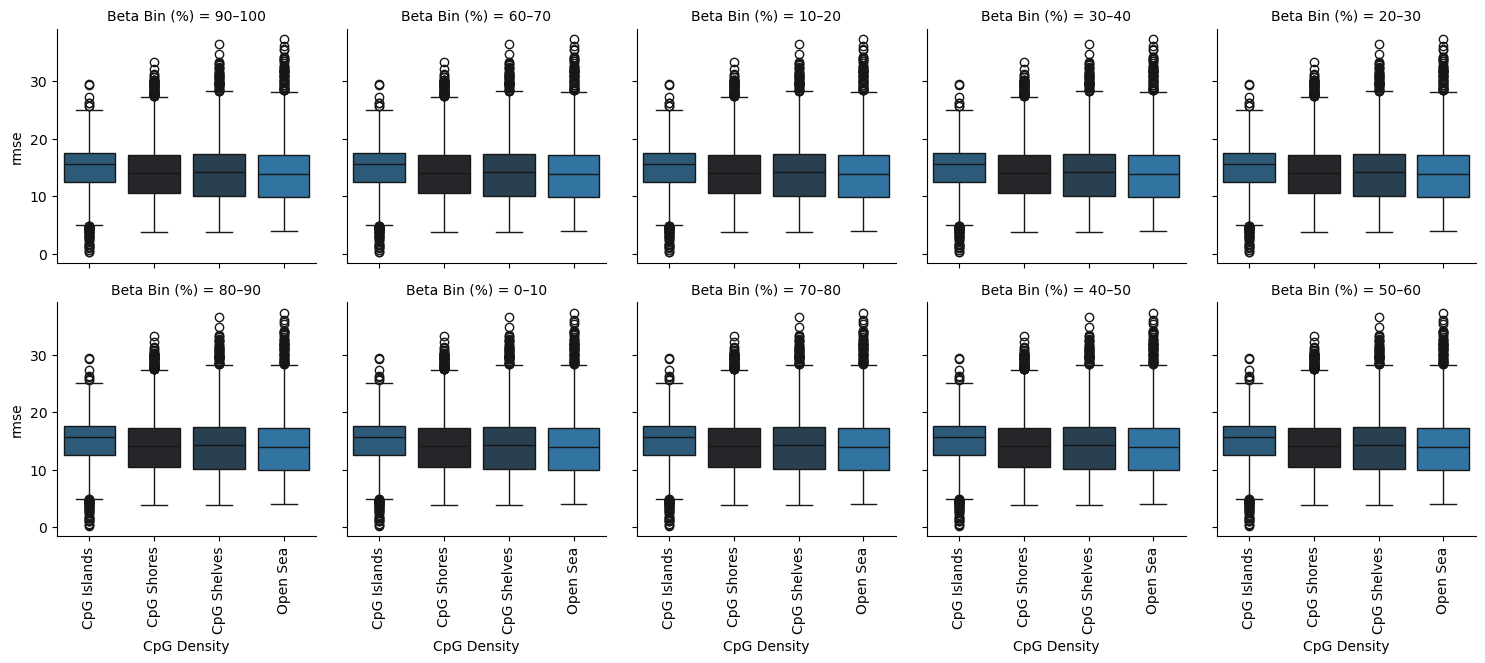

In [ ]:
beta_bins: list[str] = ['0‚Äì10', '10‚Äì20', '20‚Äì30', '30‚Äì40',
                        '40‚Äì50', '50‚Äì60', '60‚Äì70', '70‚Äì80',
                        '80‚Äì90', '90‚Äì100']

fig = plt.figure(figsize=(12, 10))
g = sns.FacetGrid(data=cpg_density_rows.to_pandas(),
                  col='Beta Bin (%)', col_wrap=5)
g.map(sns.boxplot, data=cpg_density_rows.to_pandas(),
      x='CpG Density', y='rmse', hue='CpG Density',
      order=['CpG Islands', 'CpG Shores', 'CpG Shelves', 'Open Sea'],
      )
g.set_xticklabels(g.axes.flat[-1].get_xticklabels(), rotation=90)

<Axes: xlabel='CpG Density', ylabel='rmse'>

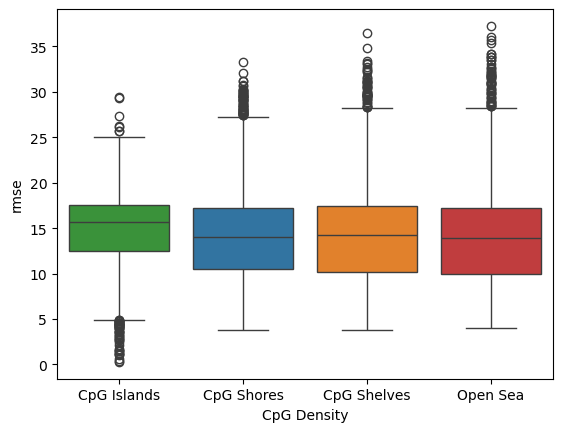

In [57]:
sns.boxplot(data=cpg_density_rows.to_pandas(),
            order=['CpG Islands', 'CpG Shores', 'CpG Shelves', 'Open Sea'],
            x='CpG Density', y='rmse', hue='CpG Density')

# Motif

In [12]:
(
    rmse.filter(pl.col('feature').str.contains_any(['b5', 'b4', 'b3', 'b2', 'b1',
                                                    'a2', 'a3', 'a4', 'a5']),
                pl.col('fgroup').str.contains('‚â•10x'))
        .unique(subset=['lab', 'sample', 'feature', 'fgroup'])
        .with_columns(pl.col('fgroup').str.splitn(by=':', n=3).alias('tmp'))
        .unnest('tmp')
        .with_columns(pl.col('feature').str.tail(n=2).alias('Base Location'))
        .rename({'field_0': 'Beta Bin (%)', 'field_1': 'Depth Bin (x)', 'field_2': 'Base'})
        ['Base'].unique().sort().to_list())

['', 'A', 'C', 'G', 'N', 'T']

In [23]:
motif_rows_wide = (
    rmse.filter(pl.col('feature').str.contains_any(['b5', 'b4', 'b3', 'b2', 'b1',
                                                    'a2', 'a3', 'a4', 'a5']),
                pl.col('fgroup').str.contains('‚â•10x'))
        .unique(subset=['lab', 'sample', 'feature', 'fgroup'])
        .with_columns(pl.col('fgroup').str.splitn(by=':', n=3).alias('tmp'))
        .unnest('tmp')
        .with_columns(pl.col('feature').str.tail(n=2).alias('Base Location'))
        .rename({'field_0': 'Beta Bin (%)', 'field_1': 'Depth Bin (x)', 'field_2': 'Base'})
        .filter(pl.col('Base').is_in({'A', 'C', 'T', 'G'}))
        .pivot(on='Base', values='rmse',
               index=['lab', 'sample', 'Base Location', 'Beta Bin (%)'])
        .drop_nulls(subset=['A', 'C', 'T', 'G']))

bases: list[str] = ['A', 'C', 'T', 'G']

motif_test_results = analyze_tool_performance(
        data=motif_rows_wide.to_pandas(),
        tool_cols=bases,
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(motif_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=3285.39, p=0.000000, W=0.053

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
Item  Mean Rank Group
   T   2.247299     a
   A   2.249796     a
   G   2.680672     b
   C   2.822233     c

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['T', 'A', 'G', 'C']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
Item  Mean Rank Group
   T   2.247299     a
   A   2.249796     a
   G   2.680672     b
   C   2.822233     c

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: T (Âπ≥ÂùáÁß©=2.25, ÁªÑ=a)
2. A (Âπ≥ÂùáÁß©=2.25, ÁªÑ=a): ‰∏é T Êó†ÊòæËëóÂ∑ÆÂºÇ (p=0.9973)
3. G (Âπ≥ÂùáÁß©=2.68, ÁªÑ=b): ÊòæËëóÂ∑Æ‰∫é A (p=0.0000)
4. C (Âπ≥ÂùáÁß©=2.82, ÁªÑ=c): ÊòæËëóÂ∑Æ‰∫é G (p=0.0000)


In [25]:
# ! b1
base_location = 'b1'
base_test_results = analyze_tool_performance(
        data=motif_rows_wide.filter(pl.col('Base Location') == base_location).to_pandas(),
        tool_cols=bases,
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(base_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=1736.04, p=0.000000, W=0.268

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
Item  Mean Rank Group
   A   1.630556     a
   T   2.357870     b
   G   2.844907     c
   C   3.166667     d

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['A', 'T', 'G', 'C']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
Item  Mean Rank Group
   A   1.630556     a
   T   2.357870     b
   G   2.844907     c
   C   3.166667     d

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: A (Âπ≥ÂùáÁß©=1.63, ÁªÑ=a)
2. T (Âπ≥ÂùáÁß©=2.36, ÁªÑ=b): ÊòæËëóÂ∑Æ‰∫é A (p=0.0000)
3. G (Âπ≥ÂùáÁß©=2.84, ÁªÑ=c): ÊòæËëóÂ∑Æ‰∫é T (p=0.0000)
4. C (Âπ≥ÂùáÁß©=3.17, ÁªÑ=d): ÊòæËëóÂ∑Æ‰∫é G (p=0.0000)


In [26]:
# ! b2
base_location = 'b2'
base_test_results = analyze_tool_performance(
        data=motif_rows_wide.filter(pl.col('Base Location') == base_location).to_pandas(),
        tool_cols=bases,
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(base_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=733.54, p=0.000000, W=0.111

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
Item  Mean Rank Group
   A   1.933697     a
   T   2.487738     b
   G   2.606267     c
   C   2.972298     d

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['A', 'T', 'G', 'C']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
Item  Mean Rank Group
   A   1.933697     a
   T   2.487738     b
   G   2.606267     c
   C   2.972298     d

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: A (Âπ≥ÂùáÁß©=1.93, ÁªÑ=a)
2. T (Âπ≥ÂùáÁß©=2.49, ÁªÑ=b): ÊòæËëóÂ∑Æ‰∫é A (p=0.0000)
3. G (Âπ≥ÂùáÁß©=2.61, ÁªÑ=c): ÊòæËëóÂ∑Æ‰∫é T (p=0.0124)
4. C (Âπ≥ÂùáÁß©=2.97, ÁªÑ=d): ÊòæËëóÂ∑Æ‰∫é G (p=0.0000)


In [27]:
# ! b3
base_location = 'b3'
base_test_results = analyze_tool_performance(
        data=motif_rows_wide.filter(pl.col('Base Location') == base_location).to_pandas(),
        tool_cols=bases,
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(base_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=441.00, p=0.000000, W=0.061

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
Item  Mean Rank Group
   T   2.205417     a
   G   2.242917     a
   C   2.751250     b
   A   2.800417     b

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['T', 'G', 'C', 'A']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
Item  Mean Rank Group
   T   2.205417     a
   G   2.242917     a
   C   2.751250     b
   A   2.800417     b

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: T (Âπ≥ÂùáÁß©=2.21, ÁªÑ=a)
2. G (Âπ≥ÂùáÁß©=2.24, ÁªÑ=a): ‰∏é T Êó†ÊòæËëóÂ∑ÆÂºÇ (p=0.7458)
3. C (Âπ≥ÂùáÁß©=2.75, ÁªÑ=b): ÊòæËëóÂ∑Æ‰∫é G (p=0.0000)
4. A (Âπ≥ÂùáÁß©=2.80, ÁªÑ=b): ‰∏é C Êó†ÊòæËëóÂ∑ÆÂºÇ (p=0.5506)


In [25]:
# ! b4
base_location = 'b4'
base_test_results = analyze_tool_performance(
        data=motif_rows_wide.filter(pl.col('Base Location') == base_location).to_pandas(),
        tool_cols=bases,
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(base_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=135.30, p=0.000000, W=0.021

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
Item  Mean Rank Group
   G   2.353704     a
   T   2.364815     a
   A   2.528704     b
   C   2.752778     c

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['G', 'T', 'A', 'C']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
Item  Mean Rank Group
   G   2.353704     a
   T   2.364815     a
   A   2.528704     b
   C   2.752778     c

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: G (Âπ≥ÂùáÁß©=2.35, ÁªÑ=a)
2. T (Âπ≥ÂùáÁß©=2.36, ÁªÑ=a): ‰∏é G Êó†ÊòæËëóÂ∑ÆÂºÇ (p=0.9921)
3. A (Âπ≥ÂùáÁß©=2.53, ÁªÑ=b): ÊòæËëóÂ∑Æ‰∫é T (p=0.0002)
4. C (Âπ≥ÂùáÁß©=2.75, ÁªÑ=c): ÊòæËëóÂ∑Æ‰∫é A (p=0.0000)


In [26]:
# ! b5
base_location = 'b5'
base_test_results = analyze_tool_performance(
        data=motif_rows_wide.filter(pl.col('Base Location') == base_location).to_pandas(),
        tool_cols=bases,
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(base_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=749.16, p=0.000000, W=0.105

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
Item  Mean Rank Group
   A   2.024759     a
   T   2.294167     b
   G   2.731431     c
   C   2.949643     d

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['A', 'T', 'G', 'C']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
Item  Mean Rank Group
   A   2.024759     a
   T   2.294167     b
   G   2.731431     c
   C   2.949643     d

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: A (Âπ≥ÂùáÁß©=2.02, ÁªÑ=a)
2. T (Âπ≥ÂùáÁß©=2.29, ÁªÑ=b): ÊòæËëóÂ∑Æ‰∫é A (p=0.0000)
3. G (Âπ≥ÂùáÁß©=2.73, ÁªÑ=c): ÊòæËëóÂ∑Æ‰∫é T (p=0.0000)
4. C (Âπ≥ÂùáÁß©=2.95, ÁªÑ=d): ÊòæËëóÂ∑Æ‰∫é G (p=0.0000)


In [28]:
# ! a2
base_location = 'a2'
base_test_results = analyze_tool_performance(
        data=motif_rows_wide.filter(pl.col('Base Location') == base_location).to_pandas(),
        tool_cols=bases,
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(base_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=1277.74, p=0.000000, W=0.178

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
Item  Mean Rank Group
   T   1.979472     a
   A   2.120235     b
   C   2.760788     c
   G   3.139506     d

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['T', 'A', 'C', 'G']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
Item  Mean Rank Group
   T   1.979472     a
   A   2.120235     b
   C   2.760788     c
   G   3.139506     d

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: T (Âπ≥ÂùáÁß©=1.98, ÁªÑ=a)
2. A (Âπ≥ÂùáÁß©=2.12, ÁªÑ=b): ÊòæËëóÂ∑Æ‰∫é T (p=0.0010)
3. C (Âπ≥ÂùáÁß©=2.76, ÁªÑ=c): ÊòæËëóÂ∑Æ‰∫é A (p=0.0000)
4. G (Âπ≥ÂùáÁß©=3.14, ÁªÑ=d): ÊòæËëóÂ∑Æ‰∫é C (p=0.0000)


In [29]:
# ! a3
base_location = 'a3'
base_test_results = analyze_tool_performance(
        data=motif_rows_wide.filter(pl.col('Base Location') == base_location).to_pandas(),
        tool_cols=bases,
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(base_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=357.54, p=0.000000, W=0.050

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
Item  Mean Rank Group
   A   2.172500     a
   T   2.376667     b
   C   2.615417     c
   G   2.835417     d

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['A', 'T', 'C', 'G']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
Item  Mean Rank Group
   A   2.172500     a
   T   2.376667     b
   C   2.615417     c
   G   2.835417     d

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: A (Âπ≥ÂùáÁß©=2.17, ÁªÑ=a)
2. T (Âπ≥ÂùáÁß©=2.38, ÁªÑ=b): ÊòæËëóÂ∑Æ‰∫é A (p=0.0000)
3. C (Âπ≥ÂùáÁß©=2.62, ÁªÑ=c): ÊòæËëóÂ∑Æ‰∫é T (p=0.0000)
4. G (Âπ≥ÂùáÁß©=2.84, ÁªÑ=d): ÊòæËëóÂ∑Æ‰∫é C (p=0.0000)


In [27]:
# ! a4
base_location = 'a4'
base_test_results = analyze_tool_performance(
        data=motif_rows_wide.filter(pl.col('Base Location') == base_location).to_pandas(),
        tool_cols=bases,
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(base_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=1069.79, p=0.000000, W=0.151

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
Item  Mean Rank Group
   T   1.780374     a
   G   2.545455     b
   C   2.765506     c
   A   2.908666     d

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['T', 'G', 'C', 'A']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
Item  Mean Rank Group
   T   1.780374     a
   G   2.545455     b
   C   2.765506     c
   A   2.908666     d

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: T (Âπ≥ÂùáÁß©=1.78, ÁªÑ=a)
2. G (Âπ≥ÂùáÁß©=2.55, ÁªÑ=b): ÊòæËëóÂ∑Æ‰∫é T (p=0.0000)
3. C (Âπ≥ÂùáÁß©=2.77, ÁªÑ=c): ÊòæËëóÂ∑Æ‰∫é G (p=0.0000)
4. A (Âπ≥ÂùáÁß©=2.91, ÁªÑ=d): ÊòæËëóÂ∑Æ‰∫é C (p=0.0008)


In [28]:
# ! a5
base_location = 'a5'
base_test_results = analyze_tool_performance(
        data=motif_rows_wide.filter(pl.col('Base Location') == base_location).to_pandas(),
        tool_cols=bases,
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(base_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=458.31, p=0.000000, W=0.064

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
Item  Mean Rank Group
   A   2.077343     a
   T   2.413199     b
   C   2.704077     c
   G   2.805380     d

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['A', 'T', 'C', 'G']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
Item  Mean Rank Group
   A   2.077343     a
   T   2.413199     b
   C   2.704077     c
   G   2.805380     d

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: A (Âπ≥ÂùáÁß©=2.08, ÁªÑ=a)
2. T (Âπ≥ÂùáÁß©=2.41, ÁªÑ=b): ÊòæËëóÂ∑Æ‰∫é A (p=0.0000)
3. C (Âπ≥ÂùáÁß©=2.70, ÁªÑ=c): ÊòæËëóÂ∑Æ‰∫é T (p=0.0000)
4. G (Âπ≥ÂùáÁß©=2.81, ÁªÑ=d): ÊòæËëóÂ∑Æ‰∫é C (p=0.0344)


In [34]:
motif_rows: pl.DataFrame = (
    rmse.filter(pl.col('feature').str.contains_any(['b5', 'b4', 'b3', 'b2', 'b1',
                                                    'a2', 'a3', 'a4', 'a5']),
                pl.col('fgroup').str.contains('‚â•10x'))
        .unique(subset=['lab', 'sample', 'feature', 'fgroup'])
        .with_columns(pl.col('fgroup').str.splitn(by=':', n=3).alias('tmp'))
        .unnest('tmp')
        .with_columns(pl.col('feature').str.tail(n=2).alias('Base Location'))
        .rename({'field_0': 'Beta Bin (%)', 'field_1': 'Depth Bin (x)', 'field_2': 'Base'})
        .drop('Depth Bin (x)', 'feature', 'fgroup')
        .filter(pl.col('Base') != '')
        .select('lab', 'sample', 'Beta Bin (%)', 'Base Location', 'Base', 'count', 'rmse')
        .sort(by=['lab', 'sample', 'Beta Bin (%)',  'Base Location', 'Base'])
    )
motif_rows

shape: (87_793, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ lab ‚îÜ sample ‚îÜ Beta Bin (%) ‚îÜ Base Location ‚îÜ Base ‚îÜ count  ‚îÜ rmse      ‚îÇ
‚îÇ --- ‚îÜ ---    ‚îÜ ---          ‚îÜ ---           ‚îÜ ---  ‚îÜ ---    ‚îÜ ---       ‚îÇ
‚îÇ str ‚îÜ str    ‚îÜ str          ‚îÜ str           ‚îÜ str  ‚îÜ i64    ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ BS1 ‚îÜ BC_1   ‚îÜ 0‚Äì10         ‚îÜ a2            ‚îÜ A    ‚îÜ 286308 ‚îÜ 6.115567  ‚îÇ
‚îÇ BS1 ‚îÜ BC_1   ‚îÜ 0‚Äì10         ‚îÜ a2            ‚îÜ C    ‚îÜ 153625 ‚îÜ 5.861405  ‚îÇ
‚îÇ BS1 ‚îÜ BC_1   ‚îÜ 0‚Äì10         ‚îÜ a2            ‚îÜ G    ‚îÜ 250489 ‚îÜ 5.959303  ‚îÇ
‚îÇ BS1 ‚îÜ BC_1   ‚îÜ 0‚Äì10         ‚îÜ a2            ‚îÜ T    ‚îÜ 336604 ‚îÜ 6.115368  ‚îÇ
‚îÇ BS1 ‚îÜ BC_1   ‚îÜ 0‚Äì10         ‚îÜ a3            ‚îÜ A    ‚îÜ 198703 ‚îÜ 6.043755  ‚îÇ
‚îÇ ‚Ä¶   ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶             ‚îÜ ‚Ä¶    ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ RR1 ‚îÜ T4_2   ‚îÜ 90‚Äì100       ‚îÜ b4            ‚îÜ C    ‚îÜ 2681   ‚îÜ 9.199045  ‚îÇ
‚îÇ RR1 ‚îÜ T4_2   ‚îÜ 90‚Äì100       ‚îÜ b4            ‚îÜ T    ‚îÜ 7      ‚îÜ 21.387697 ‚îÇ
‚îÇ RR1 ‚îÜ T4_2   ‚îÜ 90‚Äì100       ‚îÜ b5            ‚îÜ A    ‚îÜ 474    ‚îÜ 6.853269  ‚îÇ
‚îÇ RR1 ‚îÜ T4_2   ‚îÜ 90‚Äì100       ‚îÜ b5            ‚îÜ C    ‚îÜ 2210   ‚îÜ 9.625918  ‚îÇ
‚îÇ RR1 ‚îÜ T4_2   ‚îÜ 90‚Äì100       ‚îÜ b5            ‚îÜ G    ‚îÜ 7      ‚îÜ 21.387697 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [35]:
motif_rows.write_csv(data_dir / '5_detailed_motif' / 'motif_rows.csv')

<Figure size 1200x1000 with 0 Axes>

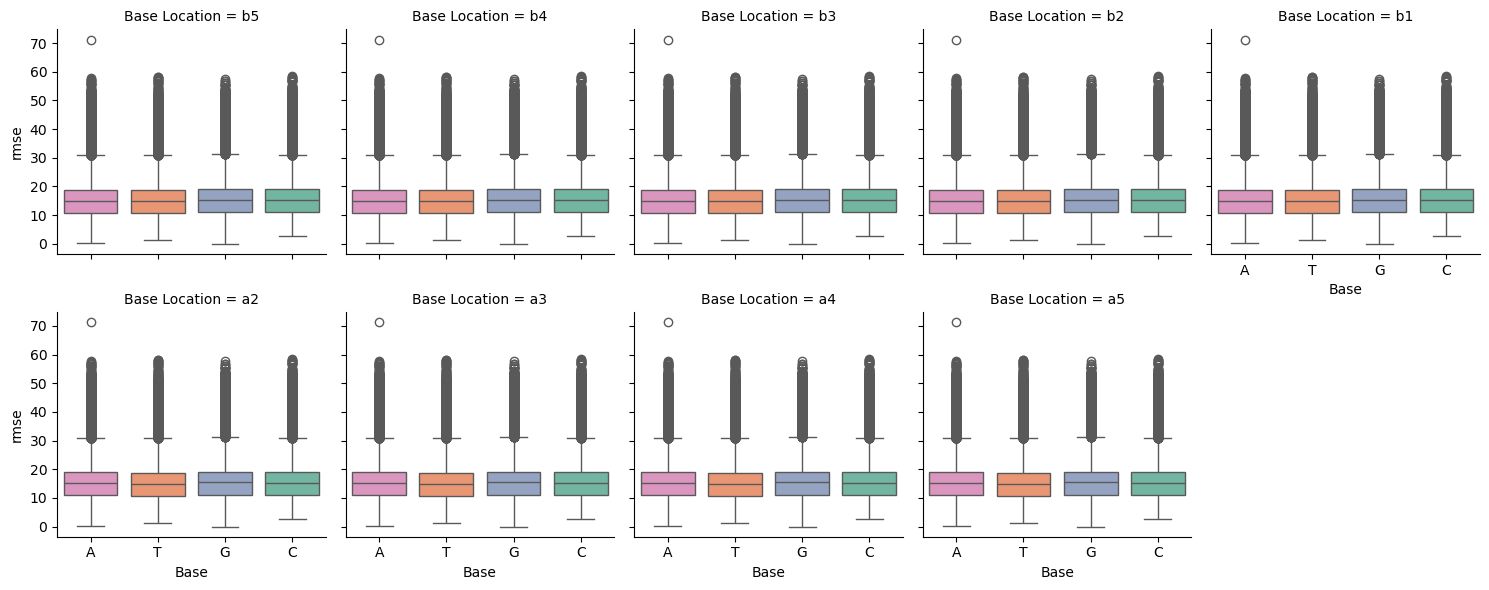

In [ ]:
fig = plt.figure(figsize=(12, 10))
g = sns.FacetGrid(data=motif_rows.to_pandas(),
                  col='Base Location', col_wrap=5,
                  col_order=['b5', 'b4', 'b3', 'b2', 'b1',
                             'a5', 'a4', 'a3', 'a2'])
g.map(sns.boxplot, data=motif_rows.to_pandas(),
      x='Base', y='rmse', order=['A', 'T', 'G', 'C'],
      hue='Base', palette='Set2')

<Figure size 1200x1000 with 0 Axes>

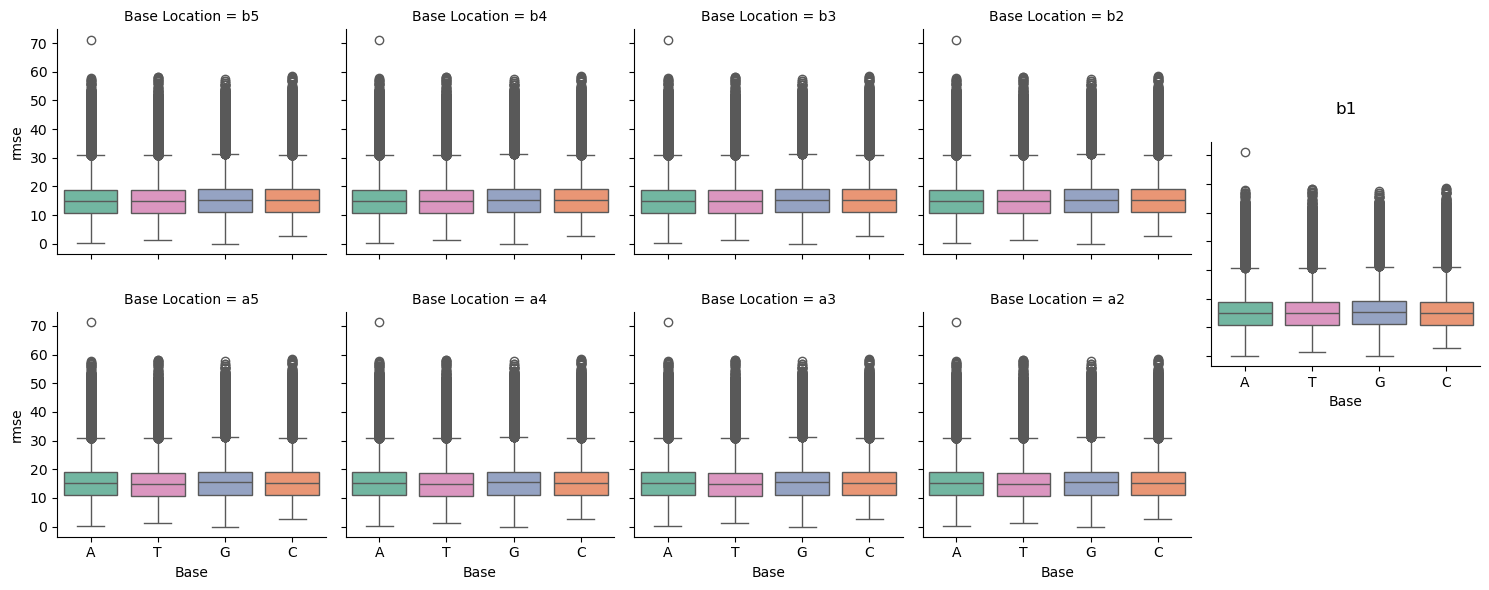

In [39]:
fig = plt.figure(figsize=(12, 10))
g = sns.FacetGrid(
    data=motif_rows.to_pandas(),
    col='Base Location',
    col_wrap=5,
    col_order=['b5', 'b4', 'b3', 'b2', 'b1',
               'a5', 'a4', 'a3', 'a2'],
    sharey=True  # ÂèØÈÄâÔºöÂÖ±‰∫´ Y ËΩ¥
)

# ÁªòÂà∂ÊâÄÊúâÂ≠êÂõæ
g.map(sns.boxplot, data=motif_rows.to_pandas(),
      x='Base', y='rmse', order=['A', 'T', 'G', 'C'],
      hue='Base', palette='Set2')

# ÊâæÂà∞ b1 ÂØπÂ∫îÁöÑ axes
# b1 ÊòØ col_order ‰∏≠ÁöÑÁ¨¨5‰∏™ÔºàÁ¥¢Âºï4Ôºâ
b1_ax = g.axes[4]  # Âõ†‰∏∫ g.axes ÊòØÊåâÈ°∫Â∫èÊéíÂàóÁöÑ

# Ëé∑ÂèñÂΩìÂâç‰ΩçÁΩÆ
pos = b1_ax.get_position()

# ‰∏ãÁßªÂçä‰∏™Ë°åÈ´ò
# ÂÅáËÆæÊØèË°åÈ´òÂ∫¶Á∫¶‰∏∫ (pos.y1 - pos.y0)
row_height = pos.height
dy = row_height * 0.5  # ‰∏ãÁßªÂçä‰∏™ÂçïÂÖÉÊ†º

# ‰øÆÊîπ‰ΩçÁΩÆÔºöy0 Âíå y1 ÈÉΩ‰∏ãÁßª
new_pos = [pos.x0, pos.y0 - dy, pos.width, pos.height]
b1_ax.set_position(new_pos)

# ÂèØÈÄâÔºöË∞ÉÊï¥Ê†áÈ¢ò‰ΩçÁΩÆÔºåÈÅøÂÖçÈáçÂè†
b1_ax.set_title('b1', pad=20)

plt.show()

# GC Bin

In [15]:
gc_rows: pl.DataFrame = (
    rmse.filter(pl.col('feature').str.contains('gc_bin'),
                pl.col('fgroup').str.contains('‚â•10x'))
        .unique(subset=['lab', 'sample', 'fgroup'])
        .with_columns(pl.col('lab').str.head(n=2).alias('method'))
        .with_columns(pl.col('fgroup').str.splitn(by=':', n=3).alias('tmp'))
        .unnest('tmp')
        .rename({'field_0': 'Beta Bin (%)', 'field_1': 'Depth Bin (x)', 'field_2': 'GC Bin (%)'})
        .drop('feature', 'fgroup', 'Depth Bin (x)')
    )
gc_rows

shape: (17_991, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ lab ‚îÜ sample ‚îÜ count  ‚îÜ rmse      ‚îÜ method ‚îÜ Beta Bin (%) ‚îÜ GC Bin (%) ‚îÇ
‚îÇ --- ‚îÜ ---    ‚îÜ ---    ‚îÜ ---       ‚îÜ ---    ‚îÜ ---          ‚îÜ ---        ‚îÇ
‚îÇ str ‚îÜ str    ‚îÜ i64    ‚îÜ f64       ‚îÜ str    ‚îÜ str          ‚îÜ str        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ BS4 ‚îÜ T2_1   ‚îÜ 12932  ‚îÜ 20.744064 ‚îÜ BS     ‚îÜ 30‚Äì40        ‚îÜ 50‚Äì60      ‚îÇ
‚îÇ PS1 ‚îÜ D5_2   ‚îÜ 98490  ‚îÜ 18.020669 ‚îÜ PS     ‚îÜ 60‚Äì70        ‚îÜ 20‚Äì30      ‚îÇ
‚îÇ PS2 ‚îÜ D6_2   ‚îÜ 23861  ‚îÜ 11.669738 ‚îÜ PS     ‚îÜ 80‚Äì90        ‚îÜ 50‚Äì60      ‚îÇ
‚îÇ EM3 ‚îÜ T1_1   ‚îÜ 43274  ‚îÜ 11.541309 ‚îÜ EM     ‚îÜ 10‚Äì20        ‚îÜ 70‚Äì80      ‚îÇ
‚îÇ RR1 ‚îÜ T2_1   ‚îÜ 12664  ‚îÜ 8.649472  ‚îÜ RR     ‚îÜ 0‚Äì10         ‚îÜ 40‚Äì50      ‚îÇ
‚îÇ ‚Ä¶   ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶          ‚îÇ
‚îÇ BS1 ‚îÜ D5_2   ‚îÜ 156622 ‚îÜ 12.532023 ‚îÜ BS     ‚îÜ 20‚Äì30        ‚îÜ 50‚Äì60      ‚îÇ
‚îÇ EM4 ‚îÜ T3_2   ‚îÜ 71794  ‚îÜ 6.374181  ‚îÜ EM     ‚îÜ 0‚Äì10         ‚îÜ 70‚Äì80      ‚îÇ
‚îÇ PS3 ‚îÜ BL_2   ‚îÜ 16     ‚îÜ 15.684557 ‚îÜ PS     ‚îÜ 70‚Äì80        ‚îÜ 0‚Äì10       ‚îÇ
‚îÇ BS3 ‚îÜ D5_2   ‚îÜ 43     ‚îÜ 11.82455  ‚îÜ BS     ‚îÜ 30‚Äì40        ‚îÜ 10‚Äì20      ‚îÇ
‚îÇ BS2 ‚îÜ T4_1   ‚îÜ 282727 ‚îÜ 12.844378 ‚îÜ BS     ‚îÜ 30‚Äì40        ‚îÜ 50‚Äì60      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [16]:
gc_wide: pl.DataFrame = (
    gc_rows.pivot(index=['lab', 'sample', 'method', 'Beta Bin (%)'], on='GC Bin (%)', values='rmse')
)

base_test_results = analyze_tool_performance(
        data=gc_wide.drop_nulls().to_pandas(),
        tool_cols=[f'{i}‚Äì{i + 10}' for i in range(0, 100, 10)],
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(base_test_results)



===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=21.04, p=0.012479, W=0.167

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
  Item  Mean Rank Group
 30‚Äì40   3.714286     a
 40‚Äì50   3.857143     a
 20‚Äì30   4.357143     a
 50‚Äì60   4.928571     a
 60‚Äì70   5.571429     a
90‚Äì100   5.928571     a
 70‚Äì80   6.357143     a
  0‚Äì10   6.357143     a
 10‚Äì20   6.571429     a
 80‚Äì90   7.357143     a

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['30‚Äì40', '40‚Äì50', '20‚Äì30', '50‚Äì60', '60‚Äì70', '90‚Äì100', '70‚Äì80', '0‚Äì10', '10‚Äì20', '80‚Äì90']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
  Item  Mean Rank Group
 30‚Äì40   3.714286     a
 40‚Äì50   3.857143     a
 20‚Äì30   4.357143     a
 50‚Äì60   4.928571     a
 60‚Äì70   5.571429     a
90‚Äì100   5.928571     a
 70‚Äì80   6.357143     a
  0‚Äì10   6.357143     a
 10‚Äì20   6.571429     a
 80‚Äì90   7.357143     a

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: 30‚Äì40 

<Figure size 1200x1000 with 0 Axes>

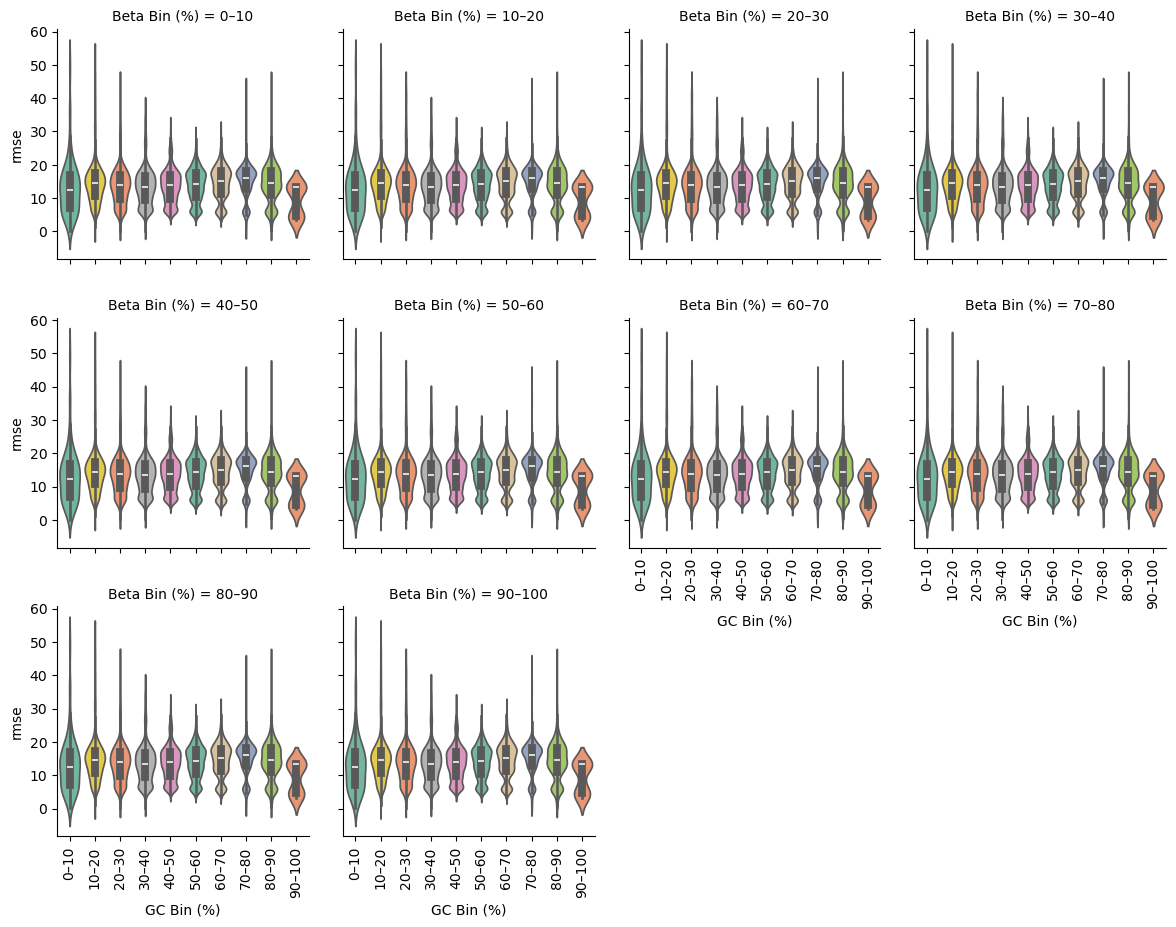

In [17]:
fig = plt.figure(figsize=(12, 10))
g = sns.FacetGrid(
    data=gc_rows.to_pandas(),
    col='Beta Bin (%)',
    col_wrap=4,
    col_order=[f'{i}‚Äì{i + 10}' for i in range(0, 100, 10)],
    sharey=True  # ÂèØÈÄâÔºöÂÖ±‰∫´ Y ËΩ¥
)

# ÁªòÂà∂ÊâÄÊúâÂ≠êÂõæ
g.map(sns.violinplot, data=gc_rows.to_pandas(),
      x='GC Bin (%)', y='rmse', order=[f'{i}‚Äì{i + 10}' for i in range(0, 100, 10)],
      hue='GC Bin (%)', palette='Set2')

g.set_xticklabels(g.axes.flat[-1].get_xticklabels(), rotation=90)

In [12]:
gc_rows.write_csv(data_dir / '6_detailed_seq_features' / '1_gc_content' / 'gc_rows.csv')

In [11]:
all_feature_dir: Path = Path('/mnt/eqa/zhangyuanfeng/methylation/best_pipeline/data/feature_importance')

old_names: list[str] = [
    'CpG_GC_ratio_70', 'GC%_70', 'GC_skew_70', 'ShannonEntropy_70', 'BWT_ratio_70',
    'b1', 'b2', 'b3', 'b4', 'b5', 'a2', 'a3', 'a4', 'a5',
    'cpg', 'depth', 'enhancer', 'location', 'promoter', 'modification_type']
new_names: list[str] = [
    'CpG / GC', 'GC%', 'GC skew', 'Shannon Entropy', 'BWT Compression Ratio',
    'b1', 'b2', 'b3', 'b4', 'b5', 'a2', 'a3', 'a4', 'a5',
    'CpG Density', 'Sequencing Depth', 'Enhancer', 'Genetic Location',
    'Promoter', 'Methylation Type']
feature_mapping: dict[str, str] = {
    'CpG / GC': 'detailed GC content',
    'GC%': 'detailed GC content',
    'GC skew': 'detailed GC content',
    'Shannon Entropy': 'sequence complexity',
    'BWT Compression Ratio': 'sequence complexity',
    'b1': 'motif', 'b2': 'motif', 'b3': 'motif', 'b4': 'motif', 'b5': 'motif',
    'a2': 'motif', 'a3': 'motif', 'a4': 'motif', 'a5': 'motif',
    'CpG Density': 'CpG density', 'Sequencing Depth': 'sequencing depth',
    'Enhancer': 'genomic locations', 'Genetic Location': 'genomic locations',
    'Promoter': 'genomic locations', 'Methylation Type': 'methylation type'
}

group_order: list[str] = ['sequencing depth', 'methylation type', 'CpG density',
               'detailed GC content', 'sequence complexity',
               'motif', 'genomic locations']

p_values  = (pl.concat([pl.scan_csv(f, skip_rows=1, has_header=False,
                                          schema={'feature': pl.String, 'importance': pl.Float64,
                                                  'stddev': pl.Float64, 'p_value': pl.Float64,
                                                  'n': pl.Int64, 'p99_high': pl.Float64,
                                                  'p99_low': pl.Float64})
                                .with_columns(pl.lit(f.parent.name.split('_')[0]).alias('lab'),
                                              pl.lit(f.parent.name.split('_')[1]).alias('label'),
                                              pl.lit(f.parent.name.split('_')[2]).alias('rep'),
                                              pl.lit(f.parent.name).alias('sample'))
                                .select('lab', 'label', 'rep', 'sample', 'feature', 'p_value')
                                for f in all_feature_dir.rglob('feature_importance_context_70bp.csv')
                                if '10k_sample' not in f.parent.name and 'RR' not in f.name])
                        .with_columns(pl.col('feature')
                                        .replace(old=old_names, new=new_names)
                                        .alias('feature'))
                        .filter(pl.col('feature').is_in({'b5', 'b4', 'b3', 'b2', 'b1',
                                                         'a2', 'a3', 'a4', 'a5'}))
                        .collect())
p_values

shape: (648, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ lab ‚îÜ label ‚îÜ rep ‚îÜ sample   ‚îÜ feature ‚îÜ p_value  ‚îÇ
‚îÇ --- ‚îÜ ---   ‚îÜ --- ‚îÜ ---      ‚îÜ ---     ‚îÜ ---      ‚îÇ
‚îÇ str ‚îÜ str   ‚îÜ str ‚îÜ str      ‚îÜ str     ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ BS1 ‚îÜ BC    ‚îÜ 1   ‚îÜ BS1_BC_1 ‚îÜ b1      ‚îÜ 0.000007 ‚îÇ
‚îÇ BS1 ‚îÜ BC    ‚îÜ 1   ‚îÜ BS1_BC_1 ‚îÜ b4      ‚îÜ 0.000705 ‚îÇ
‚îÇ BS1 ‚îÜ BC    ‚îÜ 1   ‚îÜ BS1_BC_1 ‚îÜ a3      ‚îÜ 0.00003  ‚îÇ
‚îÇ BS1 ‚îÜ BC    ‚îÜ 1   ‚îÜ BS1_BC_1 ‚îÜ a4      ‚îÜ 0.000218 ‚îÇ
‚îÇ BS1 ‚îÜ BC    ‚îÜ 1   ‚îÜ BS1_BC_1 ‚îÜ a2      ‚îÜ 0.000186 ‚îÇ
‚îÇ ‚Ä¶   ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶   ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶        ‚îÇ
‚îÇ PS2 ‚îÜ D5    ‚îÜ 1   ‚îÜ PS2_D5_1 ‚îÜ a4      ‚îÜ 0.000134 ‚îÇ
‚îÇ PS2 ‚îÜ D5    ‚îÜ 1   ‚îÜ PS2_D5_1 ‚îÜ b3      ‚îÜ 0.000005 ‚îÇ
‚îÇ PS2 ‚îÜ D5    ‚îÜ 1   ‚îÜ PS2_D5_1 ‚îÜ a5      ‚îÜ 0.000799 ‚îÇ
‚îÇ PS2 ‚îÜ D5    ‚îÜ 1   ‚îÜ PS2_D5_1 ‚îÜ b4      ‚îÜ 0.000003 ‚îÇ
‚îÇ PS2 ‚îÜ D5    ‚îÜ 1   ‚îÜ PS2_D5_1 ‚îÜ b5      ‚îÜ 0.001225 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [13]:
mean_p_values: pl.DataFrame = (p_values.group_by('feature')
                                       .agg(pl.col('p_value')
                                              .mean()
                                              .alias('mean_p_value'))
                                       .sort('feature'))
mean_p_values

shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ feature ‚îÜ mean_p_value ‚îÇ
‚îÇ ---     ‚îÜ ---          ‚îÇ
‚îÇ str     ‚îÜ f64          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ a2      ‚îÜ 0.000416     ‚îÇ
‚îÇ a3      ‚îÜ 0.000363     ‚îÇ
‚îÇ a4      ‚îÜ 0.000212     ‚îÇ
‚îÇ a5      ‚îÜ 0.000281     ‚îÇ
‚îÇ b1      ‚îÜ 0.000154     ‚îÇ
‚îÇ b2      ‚îÜ 0.000281     ‚îÇ
‚îÇ b3      ‚îÜ 0.000313     ‚îÇ
‚îÇ b4      ‚îÜ 0.000298     ‚îÇ
‚îÇ b5      ‚îÜ 0.000812     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

# CpG / GC ratio

In [18]:
cpg_gc_rows: pl.DataFrame = (
    rmse.filter(pl.col('feature').str.contains('cpg_prop'),
                pl.col('fgroup').str.contains('‚â•10x'))
        .unique(subset=['lab', 'sample', 'fgroup'])
        .with_columns(pl.col('lab').str.head(n=2).alias('method'))
        .with_columns(pl.col('fgroup').str.splitn(by=':', n=3).alias('tmp'))
        .unnest('tmp')
        .rename({'field_0': 'Beta Bin (%)', 'field_1': 'Depth Bin (x)', 'field_2': 'Cpg Prop Bin (%)'})
        .drop('feature', 'fgroup', 'Depth Bin (x)')
    )
cpg_gc_rows

shape: (43_531, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ lab ‚îÜ sample ‚îÜ count  ‚îÜ rmse      ‚îÜ method ‚îÜ Beta Bin (%) ‚îÜ Cpg Prop Bin (%) ‚îÇ
‚îÇ --- ‚îÜ ---    ‚îÜ ---    ‚îÜ ---       ‚îÜ ---    ‚îÜ ---          ‚îÜ ---              ‚îÇ
‚îÇ str ‚îÜ str    ‚îÜ i64    ‚îÜ f64       ‚îÜ str    ‚îÜ str          ‚îÜ str              ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ EM3 ‚îÜ T4_2   ‚îÜ 241    ‚îÜ 11.265967 ‚îÜ EM     ‚îÜ 20‚Äì30        ‚îÜ 0.3‚Äì0.32         ‚îÇ
‚îÇ PS3 ‚îÜ F7_2   ‚îÜ 508012 ‚îÜ 14.646213 ‚îÜ PS     ‚îÜ 70‚Äì80        ‚îÜ 0.06‚Äì0.08        ‚îÇ
‚îÇ EM2 ‚îÜ D6_2   ‚îÜ 415196 ‚îÜ 8.389085  ‚îÜ EM     ‚îÜ 10‚Äì20        ‚îÜ 0.1‚Äì0.12         ‚îÇ
‚îÇ RR1 ‚îÜ T3_2   ‚îÜ 1368   ‚îÜ 7.765559  ‚îÜ RR     ‚îÜ 90‚Äì100       ‚îÜ 0.18‚Äì0.2         ‚îÇ
‚îÇ BS1 ‚îÜ M8_1   ‚îÜ 425846 ‚îÜ 14.518389 ‚îÜ BS     ‚îÜ 80‚Äì90        ‚îÜ 0.12‚Äì0.14        ‚îÇ
‚îÇ ‚Ä¶   ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶                ‚îÇ
‚îÇ BS3 ‚îÜ T3_2   ‚îÜ 4861   ‚îÜ 11.427054 ‚îÜ BS     ‚îÜ 20‚Äì30        ‚îÜ 0.24‚Äì0.26        ‚îÇ
‚îÇ EM4 ‚îÜ D6_2   ‚îÜ 206608 ‚îÜ 5.900651  ‚îÜ EM     ‚îÜ 0‚Äì10         ‚îÜ 0.1‚Äì0.12         ‚îÇ
‚îÇ EM4 ‚îÜ T4_1   ‚îÜ 23     ‚îÜ 11.087234 ‚îÜ EM     ‚îÜ 80‚Äì90        ‚îÜ 0.04‚Äì0.06        ‚îÇ
‚îÇ RR1 ‚îÜ BC_2   ‚îÜ 17432  ‚îÜ 17.998225 ‚îÜ RR     ‚îÜ 60‚Äì70        ‚îÜ 0.2‚Äì0.22         ‚îÇ
‚îÇ RR1 ‚îÜ F7_2   ‚îÜ 4468   ‚îÜ 17.121985 ‚îÜ RR     ‚îÜ 50‚Äì60        ‚îÜ 0.1‚Äì0.12         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [21]:
cpg_gc_wide: pl.DataFrame = (
    cpg_gc_rows.pivot(index=['lab', 'sample', 'method', 'Beta Bin (%)'], on='Cpg Prop Bin (%)', values='rmse')
)

cpg_gc_test_results = analyze_tool_performance(
        data=cpg_gc_wide.drop_nulls().to_pandas(),
        tool_cols=cpg_gc_rows['Cpg Prop Bin (%)'].unique().sort().to_list(),
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(cpg_gc_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=292.71, p=0.000000, W=0.029

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
     Item  Mean Rank Group
 0.0‚Äì0.02   8.953815     a
0.02‚Äì0.04   9.550201     a
 0.4‚Äì0.42   9.819277     a
0.04‚Äì0.06  10.281124     a
0.06‚Äì0.08  10.359438     a
0.14‚Äì0.16  10.465863     a
 0.08‚Äì0.1  10.536145     a
0.12‚Äì0.14  10.578313     a
0.16‚Äì0.18  10.636546     a
 0.1‚Äì0.12  10.732932     a
 0.18‚Äì0.2  10.793173     a
 0.2‚Äì0.22  10.861446     a
0.22‚Äì0.24  10.979920     a
0.24‚Äì0.26  11.200803     a
0.36‚Äì0.38  11.449799     a
0.26‚Äì0.28  11.632530     a
 0.38‚Äì0.4  11.648594     a
 0.28‚Äì0.3  11.732932     a
 0.3‚Äì0.32  12.582329     a
0.34‚Äì0.36  12.847390     a
0.32‚Äì0.34  13.357430     a

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['0.0‚Äì0.02', '0.02‚Äì0.04', '0.4‚Äì0.42', '0.04‚Äì0.06', '0.06‚Äì0.08', '0.14‚Äì0.16', '0.08‚Äì0.1', '0.12‚Äì0.14', '0.16‚Äì0.18', '0.1‚Äì0.12', '0.18‚Äì0.2', '0.2‚Äì0.22', '0.22‚Äì0.24', '0.24‚Äì0.26', '0.36‚Äì0.38', '0.26‚

# GC skew

In [23]:
gc_skew_rows: pl.DataFrame = (
    rmse.filter(pl.col('feature').str.contains('gc_skew'),
                pl.col('fgroup').str.contains('‚â•10x'))
        .unique(subset=['lab', 'sample', 'fgroup'])
        .with_columns(pl.col('lab').str.head(n=2).alias('method'))
        .with_columns(pl.col('fgroup').str.splitn(by=':', n=3).alias('tmp'))
        .unnest('tmp')
        .rename({'field_0': 'Beta Bin (%)', 'field_1': 'Depth Bin (x)', 'field_2': 'GC skew Bin'})
        .drop('feature', 'fgroup', 'Depth Bin (x)')
    )
gc_skew_rows

shape: (43_341, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ lab ‚îÜ sample ‚îÜ count  ‚îÜ rmse      ‚îÜ method ‚îÜ Beta Bin (%) ‚îÜ GC skew Bin ‚îÇ
‚îÇ --- ‚îÜ ---    ‚îÜ ---    ‚îÜ ---       ‚îÜ ---    ‚îÜ ---          ‚îÜ ---         ‚îÇ
‚îÇ str ‚îÜ str    ‚îÜ i64    ‚îÜ f64       ‚îÜ str    ‚îÜ str          ‚îÜ str         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ EM3 ‚îÜ M8_1   ‚îÜ 330161 ‚îÜ 13.308474 ‚îÜ EM     ‚îÜ 40‚Äì50        ‚îÜ 0.1 ‚Äì 0.2   ‚îÇ
‚îÇ BS3 ‚îÜ T2_1   ‚îÜ 108    ‚îÜ 19.002073 ‚îÜ BS     ‚îÜ 60‚Äì70        ‚îÜ 0.7 ‚Äì 0.8   ‚îÇ
‚îÇ RR1 ‚îÜ T1_2   ‚îÜ 83     ‚îÜ 16.352664 ‚îÜ RR     ‚îÜ 60‚Äì70        ‚îÜ -0.6 ‚Äì -0.5 ‚îÇ
‚îÇ BS1 ‚îÜ BL_2   ‚îÜ 6504   ‚îÜ 14.113844 ‚îÜ BS     ‚îÜ 30‚Äì40        ‚îÜ 0.5 ‚Äì 0.6   ‚îÇ
‚îÇ BS3 ‚îÜ BL_1   ‚îÜ 429    ‚îÜ 16.344315 ‚îÜ BS     ‚îÜ 50‚Äì60        ‚îÜ -0.7 ‚Äì -0.6 ‚îÇ
‚îÇ ‚Ä¶   ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶           ‚îÇ
‚îÇ BS2 ‚îÜ D6_1   ‚îÜ 405361 ‚îÜ 12.606008 ‚îÜ BS     ‚îÜ 30‚Äì40        ‚îÜ 0.0 ‚Äì 0.1   ‚îÇ
‚îÇ EM3 ‚îÜ F7_1   ‚îÜ 26     ‚îÜ 15.149848 ‚îÜ EM     ‚îÜ 50‚Äì60        ‚îÜ 0.8 ‚Äì 0.9   ‚îÇ
‚îÇ EM3 ‚îÜ M8_2   ‚îÜ 5231   ‚îÜ 10.847274 ‚îÜ EM     ‚îÜ 30‚Äì40        ‚îÜ -0.6 ‚Äì -0.5 ‚îÇ
‚îÇ EM4 ‚îÜ BC_1   ‚îÜ 27243  ‚îÜ 9.359284  ‚îÜ EM     ‚îÜ 10‚Äì20        ‚îÜ 0.3 ‚Äì 0.4   ‚îÇ
‚îÇ PS1 ‚îÜ D5_2   ‚îÜ 1619   ‚îÜ 7.798566  ‚îÜ PS     ‚îÜ 90‚Äì100       ‚îÜ -0.3 ‚Äì -0.2 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [26]:
gc_skew_wide: pl.DataFrame = (
    gc_skew_rows.pivot(index=['lab', 'sample', 'method', 'Beta Bin (%)'], on='GC skew Bin', values='rmse')
)

gc_skew_test_results = analyze_tool_performance(
        data=gc_skew_wide.drop_nulls().to_pandas(),
        tool_cols=gc_skew_rows['GC skew Bin'].unique().sort().to_list(),
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(gc_skew_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=1422.55, p=0.000000, W=0.053

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
       Item  Mean Rank Group
-0.8 ‚Äì -0.7   7.882188     a
-0.7 ‚Äì -0.6   8.455119     a
  0.9 ‚Äì 1.0   8.970547     a
-1.0 ‚Äì -0.9   9.126227     a
-0.9 ‚Äì -0.8   9.405330     a
  0.8 ‚Äì 0.9   9.761571     a
-0.6 ‚Äì -0.5   9.879383     a
-0.2 ‚Äì -0.1   9.939691     a
 -0.1 ‚Äì 0.0  10.215288     a
-0.3 ‚Äì -0.2  10.350631     a
  0.7 ‚Äì 0.8  10.732819     a
-0.5 ‚Äì -0.4  10.927069     a
-0.4 ‚Äì -0.3  11.082749     a
  0.6 ‚Äì 0.7  11.123422     a
  0.0 ‚Äì 0.1  11.416550     a
  0.4 ‚Äì 0.5  11.471950     a
  0.3 ‚Äì 0.4  11.713184     a
  0.5 ‚Äì 0.6  11.850631     a
  0.2 ‚Äì 0.3  12.709677     b
  0.1 ‚Äì 0.2  12.985975     b

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['-0.8 ‚Äì -0.7', '-0.7 ‚Äì -0.6', '0.9 ‚Äì 1.0', '-1.0 ‚Äì -0.9', '-0.9 ‚Äì -0.8', '0.8 ‚Äì 0.9', '-0.6 ‚Äì -0.5', '-0.2 ‚Äì -0.1', '-0.1 ‚Äì 0.0', '-0.3 ‚Äì -0.2', '0.7 ‚Äì 0.8', '-0.5 ‚Äì -0.4', '-0.4 ‚Äì -0.3

# ShannonEntropy

In [13]:
se_rows: pl.DataFrame = (
    rmse.filter(pl.col('feature').str.contains('se_bin'),
                pl.col('fgroup').str.contains('‚â•10x'))
        .unique(subset=['lab', 'sample', 'fgroup'])
        .with_columns(pl.col('lab').str.head(n=2).alias('method'))
        .with_columns(pl.col('fgroup').str.splitn(by=':', n=3).alias('tmp'))
        .unnest('tmp')
        .rename({'field_0': 'Beta Bin (%)', 'field_1': 'Depth Bin (x)', 'field_2': 'SE Bin'})
        .drop('feature', 'fgroup', 'Depth Bin (x)')
    )
se_rows

shape: (9_360, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ lab ‚îÜ sample ‚îÜ count  ‚îÜ rmse      ‚îÜ method ‚îÜ Beta Bin (%) ‚îÜ SE Bin    ‚îÇ
‚îÇ --- ‚îÜ ---    ‚îÜ ---    ‚îÜ ---       ‚îÜ ---    ‚îÜ ---          ‚îÜ ---       ‚îÇ
‚îÇ str ‚îÜ str    ‚îÜ i64    ‚îÜ f64       ‚îÜ str    ‚îÜ str          ‚îÜ str       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ EM4 ‚îÜ T1_2   ‚îÜ 356701 ‚îÜ 15.973802 ‚îÜ EM     ‚îÜ 40‚Äì50        ‚îÜ low       ‚îÇ
‚îÇ EM4 ‚îÜ F7_1   ‚îÜ 451522 ‚îÜ 14.040494 ‚îÜ EM     ‚îÜ 40‚Äì50        ‚îÜ low       ‚îÇ
‚îÇ EM1 ‚îÜ T2_2   ‚îÜ 267160 ‚îÜ 9.691977  ‚îÜ EM     ‚îÜ 10‚Äì20        ‚îÜ medium    ‚îÇ
‚îÇ RR1 ‚îÜ T2_2   ‚îÜ 71093  ‚îÜ 7.688323  ‚îÜ RR     ‚îÜ 0‚Äì10         ‚îÜ medium    ‚îÇ
‚îÇ BS2 ‚îÜ T1_1   ‚îÜ 1001   ‚îÜ 5.697072  ‚îÜ BS     ‚îÜ 90‚Äì100       ‚îÜ low       ‚îÇ
‚îÇ ‚Ä¶   ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ EM1 ‚îÜ T4_1   ‚îÜ 4742   ‚îÜ 6.198959  ‚îÜ EM     ‚îÜ 90‚Äì100       ‚îÜ medium    ‚îÇ
‚îÇ EM1 ‚îÜ F7_1   ‚îÜ 426946 ‚îÜ 17.761077 ‚îÜ EM     ‚îÜ 50‚Äì60        ‚îÜ low       ‚îÇ
‚îÇ PS3 ‚îÜ BL_1   ‚îÜ 228170 ‚îÜ 14.381992 ‚îÜ PS     ‚îÜ 50‚Äì60        ‚îÜ high      ‚îÇ
‚îÇ BS4 ‚îÜ D5_2   ‚îÜ 23827  ‚îÜ 24.615868 ‚îÜ BS     ‚îÜ 0‚Äì10         ‚îÜ very_high ‚îÇ
‚îÇ EM3 ‚îÜ F7_1   ‚îÜ 515315 ‚îÜ 15.320952 ‚îÜ EM     ‚îÜ 50‚Äì60        ‚îÜ low       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [14]:
se_wide: pl.DataFrame = (
    se_rows.pivot(index=['lab', 'sample', 'method', 'Beta Bin (%)'], on='SE Bin', values='rmse')
)

se_test_results = analyze_tool_performance(
        data=se_wide.drop_nulls().to_pandas(),
        tool_cols=['low', 'medium', 'high', 'very_high'],
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(se_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=208.76, p=0.000000, W=0.032

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
     Item  Mean Rank Group
very_high   2.272222     a
      low   2.332407     a
   medium   2.659259     b
     high   2.736111     b

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['very_high', 'low', 'medium', 'high']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
     Item  Mean Rank Group
very_high   2.272222     a
      low   2.332407     a
   medium   2.659259     b
     high   2.736111     b

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: very_high (Âπ≥ÂùáÁß©=2.27, ÁªÑ=a)
2. low (Âπ≥ÂùáÁß©=2.33, ÁªÑ=a): ‰∏é very_high Êó†ÊòæËëóÂ∑ÆÂºÇ (p=0.4182)
3. medium (Âπ≥ÂùáÁß©=2.66, ÁªÑ=b): ÊòæËëóÂ∑Æ‰∫é low (p=0.0000)
4. high (Âπ≥ÂùáÁß©=2.74, ÁªÑ=b): ‰∏é medium Êó†ÊòæËëóÂ∑ÆÂºÇ (p=0.2048)


<Figure size 1200x1000 with 0 Axes>

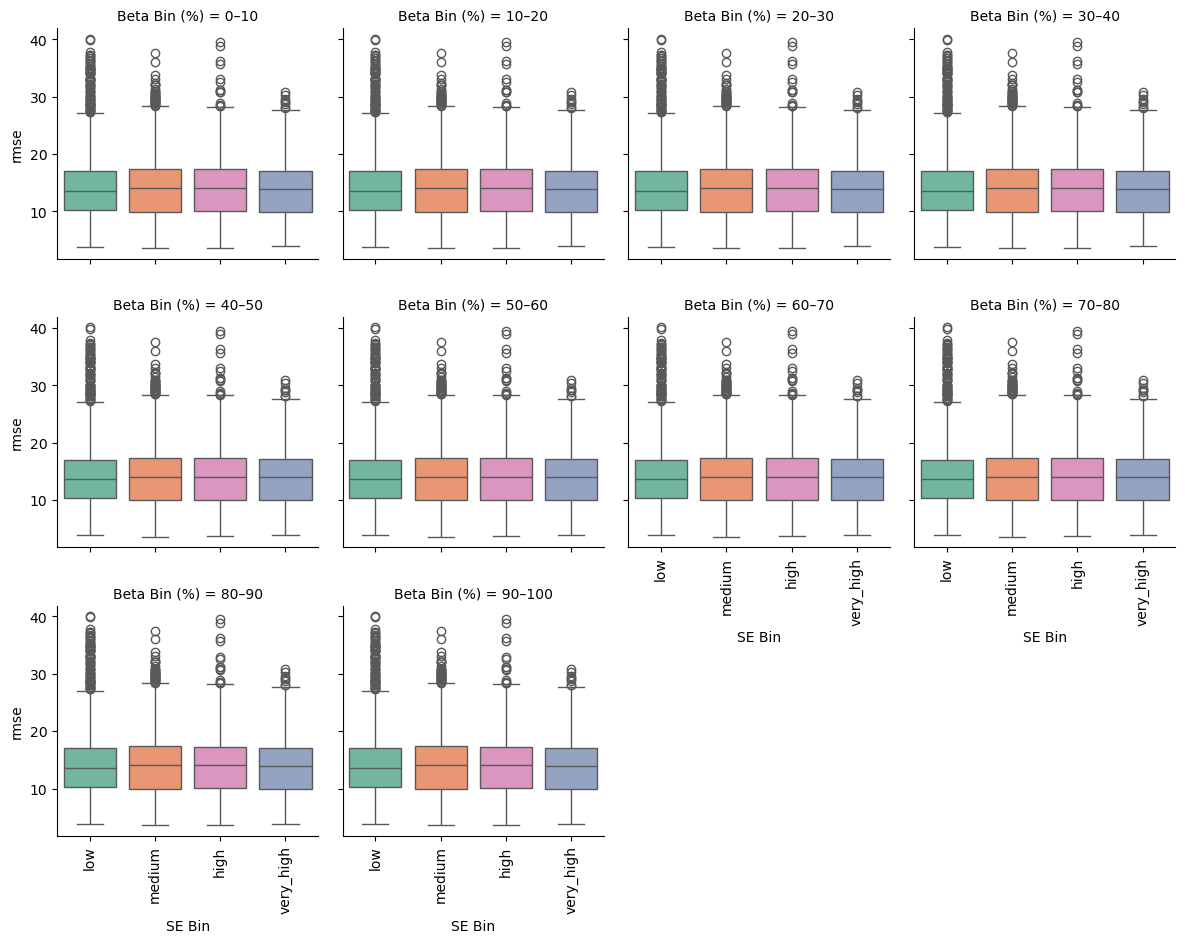

In [21]:
fig = plt.figure(figsize=(12, 10))
g = sns.FacetGrid(
    data=se_rows.to_pandas(),
    col='Beta Bin (%)',
    col_wrap=4,
    col_order=[f'{i}‚Äì{i + 10}' for i in range(0, 100, 10)],
    sharey=True  # ÂèØÈÄâÔºöÂÖ±‰∫´ Y ËΩ¥
)

# ÁªòÂà∂ÊâÄÊúâÂ≠êÂõæ
g.map(sns.boxplot, data=se_rows.to_pandas(),
      x='SE Bin', y='rmse', order=['low', 'medium', 'high', 'very_high'],
      hue='SE Bin', palette='Set2')

g.set_xticklabels(g.axes.flat[-1].get_xticklabels(), rotation=90)

In [22]:
se_rows.write_csv(data_dir / '6_detailed_seq_features' / '2_seq_complexity' / 'shannon_entropy_rows.csv')

# BWT Ratio

In [23]:
bwt_rows: pl.DataFrame = (
    rmse.filter(pl.col('feature').str.contains('bwt_bin'),
                pl.col('fgroup').str.contains('‚â•10x'))
        .unique(subset=['lab', 'sample', 'fgroup'])
        .with_columns(pl.col('lab').str.head(n=2).alias('method'))
        .with_columns(pl.col('fgroup').str.splitn(by=':', n=3).alias('tmp'))
        .unnest('tmp')
        .rename({'field_0': 'Beta Bin (%)', 'field_1': 'Depth Bin (x)', 'field_2': 'BWT Bin'})
        .drop('feature', 'fgroup', 'Depth Bin (x)')
    )
bwt_rows

shape: (9_600, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ lab ‚îÜ sample ‚îÜ count   ‚îÜ rmse      ‚îÜ method ‚îÜ Beta Bin (%) ‚îÜ BWT Bin   ‚îÇ
‚îÇ --- ‚îÜ ---    ‚îÜ ---     ‚îÜ ---       ‚îÜ ---    ‚îÜ ---          ‚îÜ ---       ‚îÇ
‚îÇ str ‚îÜ str    ‚îÜ i64     ‚îÜ f64       ‚îÜ str    ‚îÜ str          ‚îÜ str       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ EM1 ‚îÜ BL_1   ‚îÜ 9644    ‚îÜ 6.332718  ‚îÜ EM     ‚îÜ 90‚Äì100       ‚îÜ medium    ‚îÇ
‚îÇ RR1 ‚îÜ T2_2   ‚îÜ 15291   ‚îÜ 18.219072 ‚îÜ RR     ‚îÜ 50‚Äì60        ‚îÜ high      ‚îÇ
‚îÇ EM1 ‚îÜ T4_2   ‚îÜ 13189   ‚îÜ 12.799583 ‚îÜ EM     ‚îÜ 80‚Äì90        ‚îÜ high      ‚îÇ
‚îÇ BS2 ‚îÜ BC_2   ‚îÜ 4934655 ‚îÜ 17.148742 ‚îÜ BS     ‚îÜ 80‚Äì90        ‚îÜ high      ‚îÇ
‚îÇ PS1 ‚îÜ T2_1   ‚îÜ 450512  ‚îÜ 15.883103 ‚îÜ PS     ‚îÜ 50‚Äì60        ‚îÜ very_high ‚îÇ
‚îÇ ‚Ä¶   ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ EM2 ‚îÜ BC_1   ‚îÜ 4590582 ‚îÜ 17.002658 ‚îÜ EM     ‚îÜ 80‚Äì90        ‚îÜ medium    ‚îÇ
‚îÇ RR1 ‚îÜ F7_2   ‚îÜ 255068  ‚îÜ 17.667615 ‚îÜ RR     ‚îÜ 70‚Äì80        ‚îÜ medium    ‚îÇ
‚îÇ PS2 ‚îÜ T2_1   ‚îÜ 16048   ‚îÜ 11.243943 ‚îÜ PS     ‚îÜ 80‚Äì90        ‚îÜ low       ‚îÇ
‚îÇ PS2 ‚îÜ T2_2   ‚îÜ 356322  ‚îÜ 16.738321 ‚îÜ PS     ‚îÜ 50‚Äì60        ‚îÜ high      ‚îÇ
‚îÇ BS2 ‚îÜ D5_2   ‚îÜ 9979    ‚îÜ 5.48868   ‚îÜ BS     ‚îÜ 90‚Äì100       ‚îÜ high      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [24]:
bwt_wide: pl.DataFrame = (
    bwt_rows.pivot(index=['lab', 'sample', 'method', 'Beta Bin (%)'], on='BWT Bin', values='rmse')
)

bwt_test_results = analyze_tool_performance(
        data=bwt_wide.drop_nulls().to_pandas(),
        tool_cols=['low', 'medium', 'high', 'very_high'],
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(bwt_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=19.33, p=0.000233, W=0.003

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
     Item  Mean Rank Group
     high   2.443333     a
      low   2.446250     a
   medium   2.530417     a
very_high   2.580000     a

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['high', 'low', 'medium', 'very_high']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
     Item  Mean Rank Group
     high   2.443333     a
      low   2.446250     a
   medium   2.530417     a
very_high   2.580000     a

===== ÊúÄÁªàÂ∑•ÂÖ∑‰ºòÂä£È°∫Â∫èÊä•Âëä =====
1. ÊúÄ‰ºòÂ∑•ÂÖ∑: high (Âπ≥ÂùáÁß©=2.44, ÁªÑ=a)
2. low (Âπ≥ÂùáÁß©=2.45, ÁªÑ=a): ‰∏é high Êó†ÊòæËëóÂ∑ÆÂºÇ (p=0.9998)
3. medium (Âπ≥ÂùáÁß©=2.53, ÁªÑ=a): ‰∏é low Êó†ÊòæËëóÂ∑ÆÂºÇ (p=0.1079)
4. very_high (Âπ≥ÂùáÁß©=2.58, ÁªÑ=a): ‰∏é medium Êó†ÊòæËëóÂ∑ÆÂºÇ (p=0.5434)


In [25]:
bwt_rows.write_csv(data_dir / '6_detailed_seq_features' / '2_seq_complexity' / 'bwt_ratio_rows.csv')

In [27]:
ref_dir: Path = Path('/mnt/eqa/zhangyuanfeng/methylation/quartet_reference/single_c/ensembl/final/full_seq_info')
labels: list[str] = ['D5', 'D6', 'F7', 'M8', 'BC', 'BL']

ref_df: pl.DataFrame = (
    pl.concat([
        pl.scan_parquet(ref_dir / f'{label}.parquet.lz4')
          .filter(pl.col('in_hcr'))
          .select('chrom', 'start', 'GC%_70', 'GC_skew_70', 'CpG_GC_ratio_70', 'ShannonEntropy_70', 'BWT_ratio_70')
        for label in labels
    ]).collect()
)

distribution_data: dict[str, list[float]] = {}
for seq_feature in ('GC%_70', 'GC_skew_70', 'CpG_GC_ratio_70', 'ShannonEntropy_70', 'BWT_ratio_70'):
    distribution_data[seq_feature] = (ref_df.select('chrom', 'start', seq_feature)
                                            .drop_nulls()
                                            .unique(subset=['chrom', 'start'])
                                            [seq_feature]
                                            .to_list())

In [28]:
import gc
del ref_df
gc.collect()

26808

In [31]:
for feature, values in distribution_data.items():
    (pl.DataFrame({feature: values})
       .write_parquet(data_dir / '6_detailed_seq_features' / f'{feature}_values.parquet.lz4',
                      compression='lz4'))

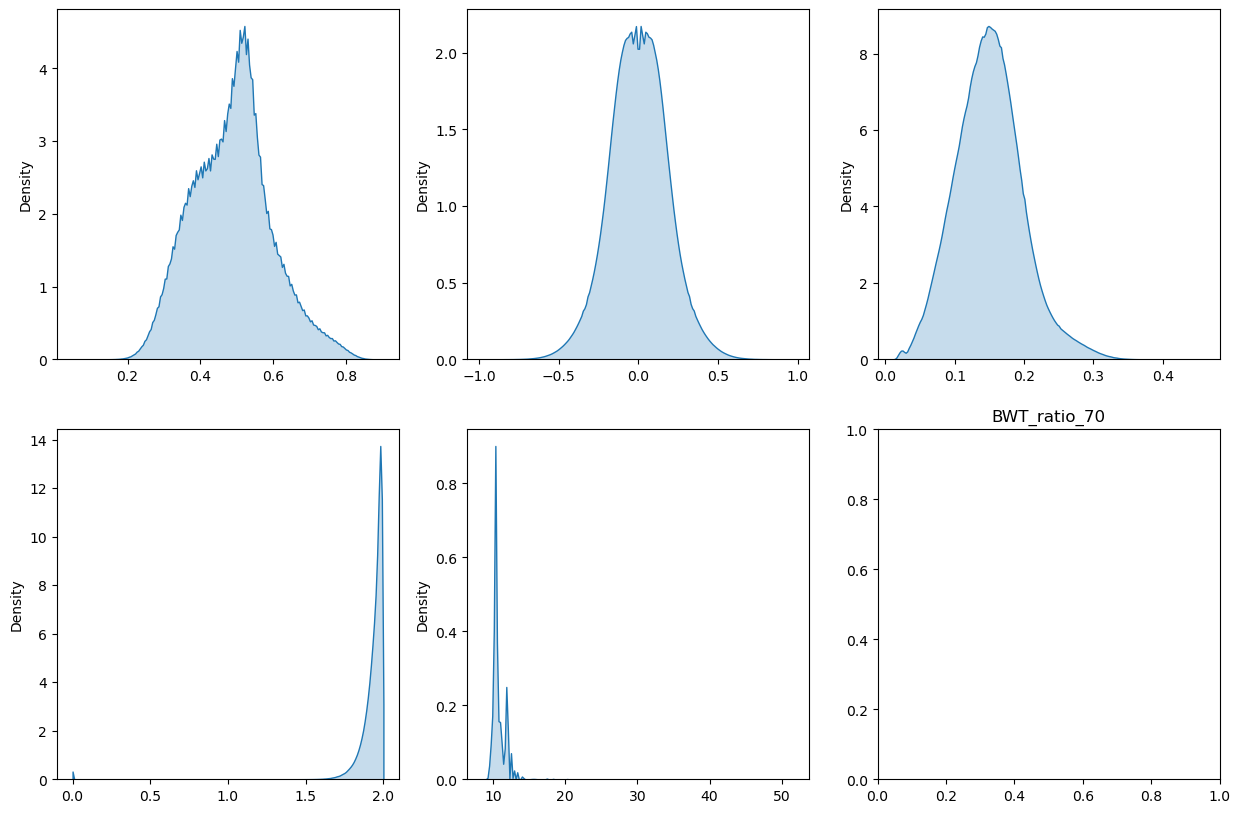

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, (feature, values) in enumerate(distribution_data.items()):
    sns.kdeplot(data=values, ax=axes[i], fill=True, cut=0)
    plt.title(feature)


# Genomic Locations

In [4]:
location_rows: pl.DataFrame = (
    rmse.filter(pl.col('feature').str.contains('location'),
                pl.col('fgroup').str.contains('‚â•10x'))
        .unique(subset=['lab', 'sample', 'fgroup'])
        .with_columns(pl.col('lab').str.head(n=2).alias('method'))
        .with_columns(pl.col('fgroup').str.splitn(by=':', n=3).alias('tmp'))
        .unnest('tmp')
        .rename({'field_0': 'Beta Bin (%)', 'field_1': 'Depth Bin (x)', 'field_2': 'Location'})
        .drop('feature', 'fgroup', 'Depth Bin (x)')
    )
location_rows

shape: (23_576, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ lab ‚îÜ sample ‚îÜ count ‚îÜ rmse      ‚îÜ method ‚îÜ Beta Bin (%) ‚îÜ Location          ‚îÇ
‚îÇ --- ‚îÜ ---    ‚îÜ ---   ‚îÜ ---       ‚îÜ ---    ‚îÜ ---          ‚îÜ ---               ‚îÇ
‚îÇ str ‚îÜ str    ‚îÜ i64   ‚îÜ f64       ‚îÜ str    ‚îÜ str          ‚îÜ str               ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ BS3 ‚îÜ T1_1   ‚îÜ 51    ‚îÜ 10.973941 ‚îÜ BS     ‚îÜ 80‚Äì90        ‚îÜ exon              ‚îÇ
‚îÇ RR1 ‚îÜ F7_1   ‚îÜ 2550  ‚îÜ 17.010567 ‚îÜ RR     ‚îÜ 80‚Äì90        ‚îÜ 1st_exon          ‚îÇ
‚îÇ BS4 ‚îÜ D6_1   ‚îÜ 43861 ‚îÜ 26.52775  ‚îÜ BS     ‚îÜ 30‚Äì40        ‚îÜ intergenic        ‚îÇ
‚îÇ PS3 ‚îÜ F7_1   ‚îÜ 3440  ‚îÜ 12.577068 ‚îÜ PS     ‚îÜ 40‚Äì50        ‚îÜ exon_intron_bound ‚îÇ
‚îÇ BS3 ‚îÜ M8_2   ‚îÜ 17    ‚îÜ 11.244148 ‚îÜ BS     ‚îÜ 90‚Äì100       ‚îÜ exon              ‚îÇ
‚îÇ ‚Ä¶   ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶                 ‚îÇ
‚îÇ PS1 ‚îÜ T2_1   ‚îÜ 2356  ‚îÜ 11.063305 ‚îÜ PS     ‚îÜ 20‚Äì30        ‚îÜ exon_intron_bound ‚îÇ
‚îÇ EM4 ‚îÜ T1_2   ‚îÜ 7463  ‚îÜ 16.534627 ‚îÜ EM     ‚îÜ 40‚Äì50        ‚îÜ intron_exon_bound ‚îÇ
‚îÇ BS2 ‚îÜ D5_1   ‚îÜ 2112  ‚îÜ 13.475556 ‚îÜ BS     ‚îÜ 30‚Äì40        ‚îÜ 5UTR              ‚îÇ
‚îÇ BS1 ‚îÜ T3_2   ‚îÜ 5890  ‚îÜ 17.020008 ‚îÜ BS     ‚îÜ 70‚Äì80        ‚îÜ exon              ‚îÇ
‚îÇ BS1 ‚îÜ T2_1   ‚îÜ 19    ‚îÜ 17.536506 ‚îÜ BS     ‚îÜ 90‚Äì100       ‚îÜ 1st_exon          ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [6]:
location_wide: pl.DataFrame = (
    location_rows.pivot(index=['lab', 'sample', 'method', 'Beta Bin (%)'], on='Location', values='rmse')
)

location_test_results = analyze_tool_performance(
        data=location_wide.drop_nulls().to_pandas(),
        tool_cols=['1st_exon', '3UTR', '5UTR', 'TTS_1to5kb', 'cds', 'exon',
                   'exon_intron_bound', 'intergenic', 'intron', 'intron_exon_bound'],
        better="smaller",  # ÊåáÊ†áË∂äÂ∞èË∂äÂ•Ω
        alpha=0.05,
        output_cd_diagram=False
    )
print_analysis_summary(location_test_results)


===== Â∑•ÂÖ∑ÊÄßËÉΩÂàÜÊûêÊëòË¶Å =====
FriedmanÊ£ÄÈ™å: œá¬≤=1393.10, p=0.000000, W=0.076

Â∑•ÂÖ∑Âπ≥ÂùáÁß©:
             Item  Mean Rank Group
       intergenic   4.238446     a
             exon   4.352016     a
           intron   4.641593     a
exon_intron_bound   5.294494     b
         1st_exon   5.659292     c
intron_exon_bound   5.836283     c
       TTS_1to5kb   5.865290     c
              cds   6.202557     d
             3UTR   6.444444     d
             5UTR   6.465585     d

‰ºòÂä£È°∫Â∫èÔºà‰ªé‰ºòÂà∞Âä£Ôºâ: ['intergenic', 'exon', 'intron', 'exon_intron_bound', '1st_exon', 'intron_exon_bound', 'TTS_1to5kb', 'cds', '3UTR', '5UTR']

FriedmanÊ£ÄÈ™åÊòæËëó (p<0.05)ÔºåÂ≠òÂú®Â∑•ÂÖ∑Èó¥Â∑ÆÂºÇ

Â∑•ÂÖ∑ÂàÜÁªÑÁªìÊûúÔºàÂ≠óÊØçÁõ∏ÂêåË°®Á§∫Êó†ÊòæËëóÂ∑ÆÂºÇÔºâ:
             Item  Mean Rank Group
       intergenic   4.238446     a
             exon   4.352016     a
           intron   4.641593     a
exon_intron_bound   5.294494     b
         1st_exon   5.659292     c
intron_exon_bound   5.83628

In [7]:
enhancer_rows: pl.DataFrame = (
    rmse.filter(pl.col('feature').str.contains('enhancer'),
                pl.col('fgroup').str.contains('‚â•10x'))
        .unique(subset=['lab', 'sample', 'fgroup'])
        .with_columns(pl.col('lab').str.head(n=2).alias('method'))
        .with_columns(pl.col('fgroup').str.splitn(by=':', n=3).alias('tmp'))
        .unnest('tmp')
        .rename({'field_0': 'Beta Bin (%)', 'field_1': 'Depth Bin (x)', 'field_2': 'enhancer'})
        .drop('feature', 'fgroup', 'Depth Bin (x)')
    )
enhancer_rows

shape: (4_788, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ lab ‚îÜ sample ‚îÜ count    ‚îÜ rmse      ‚îÜ method ‚îÜ Beta Bin (%) ‚îÜ enhancer ‚îÇ
‚îÇ --- ‚îÜ ---    ‚îÜ ---      ‚îÜ ---       ‚îÜ ---    ‚îÜ ---          ‚îÜ ---      ‚îÇ
‚îÇ str ‚îÜ str    ‚îÜ i64      ‚îÜ f64       ‚îÜ str    ‚îÜ str          ‚îÜ str      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ RR1 ‚îÜ T4_2   ‚îÜ 5        ‚îÜ 5.044854  ‚îÜ RR     ‚îÜ 90‚Äì100       ‚îÜ true     ‚îÇ
‚îÇ BS4 ‚îÜ T4_1   ‚îÜ 342      ‚îÜ 26.906321 ‚îÜ BS     ‚îÜ 30‚Äì40        ‚îÜ true     ‚îÇ
‚îÇ BS4 ‚îÜ T2_2   ‚îÜ 976      ‚îÜ 22.493187 ‚îÜ BS     ‚îÜ 60‚Äì70        ‚îÜ true     ‚îÇ
‚îÇ BS4 ‚îÜ BL_2   ‚îÜ 557209   ‚îÜ 35.860003 ‚îÜ BS     ‚îÜ 0‚Äì10         ‚îÜ false    ‚îÇ
‚îÇ EM2 ‚îÜ T4_2   ‚îÜ 54       ‚îÜ 4.428411  ‚îÜ EM     ‚îÜ 90‚Äì100       ‚îÜ true     ‚îÇ
‚îÇ ‚Ä¶   ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶        ‚îÇ
‚îÇ PS3 ‚îÜ T4_2   ‚îÜ 2164503  ‚îÜ 8.887236  ‚îÜ PS     ‚îÜ 10‚Äì20        ‚îÜ false    ‚îÇ
‚îÇ PS1 ‚îÜ M8_1   ‚îÜ 13857    ‚îÜ 12.308266 ‚îÜ PS     ‚îÜ 30‚Äì40        ‚îÜ true     ‚îÇ
‚îÇ BS3 ‚îÜ M8_1   ‚îÜ 37817    ‚îÜ 10.612326 ‚îÜ BS     ‚îÜ 10‚Äì20        ‚îÜ true     ‚îÇ
‚îÇ EM3 ‚îÜ F7_1   ‚îÜ 13486993 ‚îÜ 18.133567 ‚îÜ EM     ‚îÜ 70‚Äì80        ‚îÜ false    ‚îÇ
‚îÇ PS1 ‚îÜ F7_2   ‚îÜ 1075759  ‚îÜ 12.252713 ‚îÜ PS     ‚îÜ 20‚Äì30        ‚îÜ false    ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [12]:
from typing import Literal


def run_paired_test(true_col: pl.Series,
                    false_col: pl.Series,
                    alpha: float = .05):
    diff: pl.Series = (true_col - false_col).alias('diff')

    # Normality Test
    shapiro_stat, shapiro_p = stats.shapiro(diff)

    print(f'Shapiro-Wilk Normality Test: W={shapiro_stat:.3f}, p={shapiro_p:.3f}')
    if shapiro_p > 0.05:
        print('‚úÖ Normality Test passed. t test can be used.')
        t_stat, p_val = stats.ttest_rel(false_col, true_col)
        print(f'\nüëâ t test result:')
        print(f'  t = {t_stat:.3f}, samples = {diff.shape[0]}, p = {p_val:.3e}')
        print(f'  average diff = {diff.mean():.3f}')
        result_type = 't_test'
    else:
        print('‚ùå Normality Test failed. Wilcoxon test will be used.')
        w_stat, p_val = stats.wilcoxon(true_col, false_col)
        print(f'\nüëâ Wilcoxon test result:')
        print(f'  W = {w_stat:.0f}, p = {p_val:.3e}')
        print(f'  median diff = {diff.median():.3f}')
        result_type = 'wilcoxon'

    if p_val < alpha:
        print('‚úÖ There is a significant difference between true_col and false_col treatment (p < 0.05)')
    else:
        print('‚ùå There is no significant difference between true_col and false_col treatment (p ‚â• 0.05)')

    return result_type, diff.median(), p_val

In [14]:
enhancer_wide: pl.DataFrame = (
    enhancer_rows.pivot(index=['lab', 'sample', 'method', 'Beta Bin (%)'], on='enhancer', values='rmse').drop_nulls()
)

enhancer_test_results = run_paired_test(
    true_col=enhancer_wide['true'],
    false_col=enhancer_wide['false']
)
print(enhancer_test_results)

Shapiro-Wilk Normality Test: W=0.627, p=0.000
‚ùå Normality Test failed. Wilcoxon test will be used.

üëâ Wilcoxon test result:
  W = 1354158, p = 3.244e-02
  median diff = 0.017
‚úÖ There is a significant difference between true_col and false_col treatment (p < 0.05)
('wilcoxon', 0.0166643499396244, 0.03244499098339253)


In [15]:
promoter_rows: pl.DataFrame = (
    rmse.filter(pl.col('feature').str.contains('promoter'),
                pl.col('fgroup').str.contains('‚â•10x'))
        .unique(subset=['lab', 'sample', 'fgroup'])
        .with_columns(pl.col('lab').str.head(n=2).alias('method'))
        .with_columns(pl.col('fgroup').str.splitn(by=':', n=3).alias('tmp'))
        .unnest('tmp')
        .rename({'field_0': 'Beta Bin (%)', 'field_1': 'Depth Bin (x)', 'field_2': 'promoter'})
        .drop('feature', 'fgroup', 'Depth Bin (x)')
    )
promoter_rows

shape: (4_800, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ lab ‚îÜ sample ‚îÜ count   ‚îÜ rmse      ‚îÜ method ‚îÜ Beta Bin (%) ‚îÜ promoter ‚îÇ
‚îÇ --- ‚îÜ ---    ‚îÜ ---     ‚îÜ ---       ‚îÜ ---    ‚îÜ ---          ‚îÜ ---      ‚îÇ
‚îÇ str ‚îÜ str    ‚îÜ i64     ‚îÜ f64       ‚îÜ str    ‚îÜ str          ‚îÜ str      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ EM1 ‚îÜ T2_1   ‚îÜ 843327  ‚îÜ 17.475409 ‚îÜ EM     ‚îÜ 40‚Äì50        ‚îÜ false    ‚îÇ
‚îÇ BS3 ‚îÜ T3_1   ‚îÜ 1305607 ‚îÜ 9.498587  ‚îÜ BS     ‚îÜ 10‚Äì20        ‚îÜ false    ‚îÇ
‚îÇ BS3 ‚îÜ T1_1   ‚îÜ 750     ‚îÜ 6.510089  ‚îÜ BS     ‚îÜ 90‚Äì100       ‚îÜ true     ‚îÇ
‚îÇ RR1 ‚îÜ F7_2   ‚îÜ 256     ‚îÜ 7.391926  ‚îÜ RR     ‚îÜ 90‚Äì100       ‚îÜ true     ‚îÇ
‚îÇ PS2 ‚îÜ T4_2   ‚îÜ 23967   ‚îÜ 15.174617 ‚îÜ PS     ‚îÜ 40‚Äì50        ‚îÜ true     ‚îÇ
‚îÇ ‚Ä¶   ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶        ‚îÇ
‚îÇ EM4 ‚îÜ BC_1   ‚îÜ 31195   ‚îÜ 16.390466 ‚îÜ EM     ‚îÜ 40‚Äì50        ‚îÜ true     ‚îÇ
‚îÇ BS2 ‚îÜ BL_1   ‚îÜ 82477   ‚îÜ 13.967251 ‚îÜ BS     ‚îÜ 30‚Äì40        ‚îÜ true     ‚îÇ
‚îÇ EM4 ‚îÜ BL_2   ‚îÜ 490317  ‚îÜ 17.688428 ‚îÜ EM     ‚îÜ 70‚Äì80        ‚îÜ true     ‚îÇ
‚îÇ PS2 ‚îÜ BL_1   ‚îÜ 37231   ‚îÜ 18.234881 ‚îÜ PS     ‚îÜ 20‚Äì30        ‚îÜ true     ‚îÇ
‚îÇ EM2 ‚îÜ D5_1   ‚îÜ 3829    ‚îÜ 11.947795 ‚îÜ EM     ‚îÜ 80‚Äì90        ‚îÜ true     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [16]:
promoter_wide: pl.DataFrame = (
    promoter_rows.pivot(index=['lab', 'sample', 'method', 'Beta Bin (%)'], on='promoter', values='rmse').drop_nulls()
)

promoter_test_results = run_paired_test(
    true_col=promoter_wide['true'],
    false_col=promoter_wide['false']
)
print(promoter_test_results)

Shapiro-Wilk Normality Test: W=0.639, p=0.000
‚ùå Normality Test failed. Wilcoxon test will be used.

üëâ Wilcoxon test result:
  W = 1071381, p = 1.520e-27
  median diff = 0.119
‚úÖ There is a significant difference between true_col and false_col treatment (p < 0.05)
('wilcoxon', 0.11910706825639128, 1.5195410869745339e-27)
